In [1]:
# Needed for functions
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Import Qiskit classes
import qiskit 
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer, IBMQ, execute
from qiskit.providers.aer import noise
from qiskit.quantum_info import state_fidelity
from qiskit.tools.visualization import plot_histogram

# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
import qiskit.ignis.mitigation.measurement as mc

# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter, MeasurementFilter)

In [2]:
# Load IBMQ account
provider = IBMQ.load_account()

In [3]:
qr = qiskit.QuantumRegister(2)
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1], qr=qr, circlabel='mcal')

# Execute the calibration circuits without noise
backend = qiskit.Aer.get_backend('qasm_simulator')
job = qiskit.execute(meas_calibs, backend=backend, shots=1000)
cal_results = job.result()

# The calibration matrix without noise is the identity matrix
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')

Creation of the noise model


*   Set real_device to 1 and create the noise model from any real device

or
*   Set real_device to 0 and add noise sources manually to the noise model



In [4]:
#Create a noise model from a real device or specified by user? (0=manual, 1=real)
real_device=1

#User-specified noise model
if real_device==0:
   noise_model = noise.NoiseModel()
   device = Aer.get_backend('qasm_simulator')
  
   for qi in range(2):
      read_err = noise.errors.readout_error.ReadoutError([[0.9, 0.1],[0.25,0.75]])
      noise_model.add_readout_error(read_err, [qi])

#Noise model from real device
elif real_device==1:
   #Select backend to extract noise model from
   device = provider.get_backend('ibmqx2')

   #Create noise model
   properties = device.properties()
   coupling_map = device.configuration().coupling_map
   noise_model = noise.device.basic_device_noise_model(properties)
   basis_gates = noise_model.basis_gates

# Execute the calibration circuits using the noise model
backend = qiskit.Aer.get_backend('qasm_simulator')
noisy_job = qiskit.execute(meas_calibs, backend=backend, shots=1000, noise_model=noise_model)
results = noisy_job.result()

# Calculate the calibration matrix
meas_fitter = CompleteMeasFitter(results, state_labels, circlabel='mcal')
meas_filter = meas_fitter.filter

# What is the measurement fidelity?
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())

Average Measurement Fidelity: 0.938250


**Setting up the experiment**

The four following parameters can be set before to run the experiment:

*   Simulate noise using the Aer Qasm simulator from the noise model
*   Apply error mitigation (from the noise model) to the computation
*   Run in random mode, reaching any random values of V_k, P_k and C (otherwise experimental angles will be set to compute 13 points reaching all extremal values for V_A, P_A and C
*   Choice of the backend to use for the experiment (has no effect if noise_simulation is set to 1)

Default values are all set to 0, using the Aer Qasm simulator.

You can also specify the path where the data will be registered (.txt files useful for further analysis)

In [ ]:
# Simulate noise with the noise model? (the simulator will be used)
noise_simulation=0
# Apply error mitigation from the noise model to the result?
correction=0
# Pick random points? (otherwise 13 points will be selected to reach equally the 1/8 of sphere)
rand=0

backend_1 = provider.get_backend('ibmqx2')
simulator = qiskit.Aer.get_backend('qasm_simulator')
# Choose the backend to use
backend = simulator

# Set path to store data
path="drive/My Drive/C_VDC/"

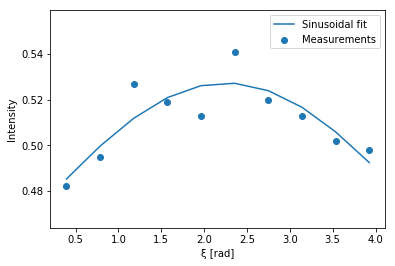

ξ_min :  2.25493017248507 , I_min :  0.5273303121105036


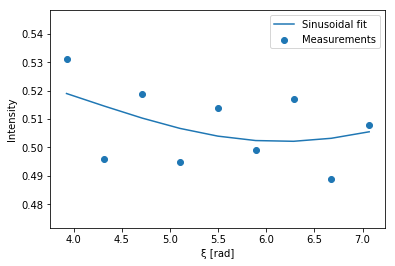

ξ_max :  6.163725147163447 , I_max :  0.5021178663798996
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 2.25493017248507
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 2.25493017248507


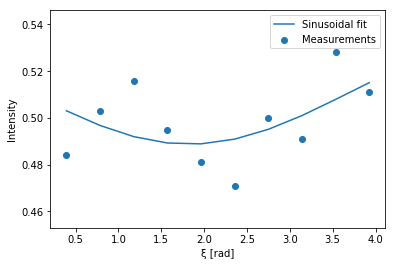

ξ_min :  1.8273310540077394 , I_min :  0.4887475667514333


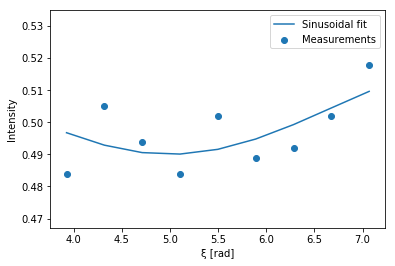

ξ_max :  5.00037812738732 , I_max :  0.49002811789918993
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 1.8273310540077394
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 1.8273310540077394


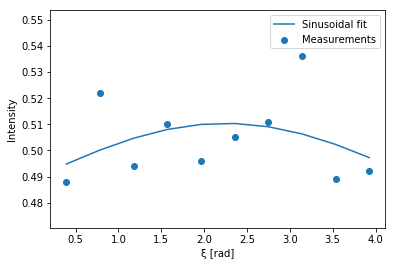

ξ_min :  2.2468595565602993 , I_min :  0.5103787772373491


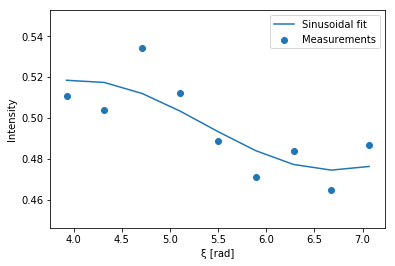

ξ_max :  4.71238898038469 , I_max :  0.5119978766696275
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 2.2468595565602993
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 2.2468595565602993


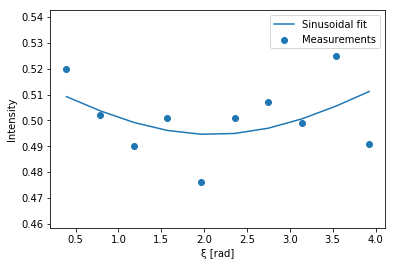

ξ_min :  2.0941382070387298 , I_min :  0.49452408461434727


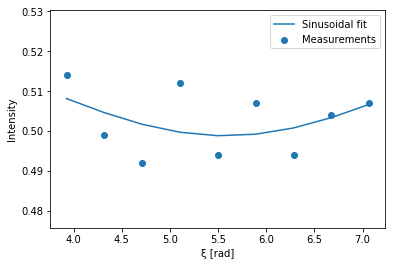

ξ_max :  5.575820284840955 , I_max :  0.4988055670733454
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 2.0941382070387298
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 2.0941382070387298


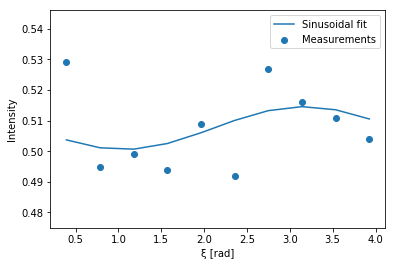

ξ_min :  1.5707963267948966 , I_min :  0.5025144976723035


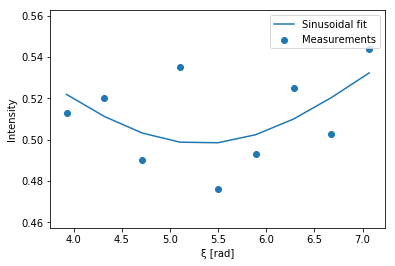

ξ_max :  5.327829192170079 , I_max :  0.498154922368386
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 1.5707963267948966
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 1.5707963267948966


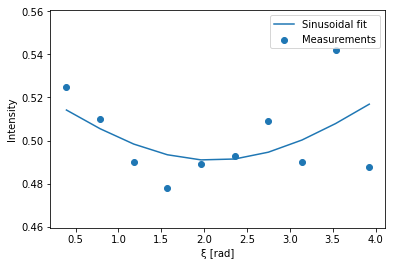

ξ_min :  2.1026590325698535 , I_min :  0.490913872208035


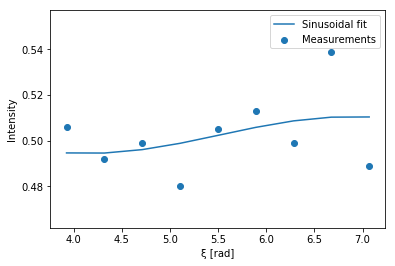

ξ_max :  4.71238898038469 , I_max :  0.4961206143318468
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 2.1026590325698535
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 2.1026590325698535


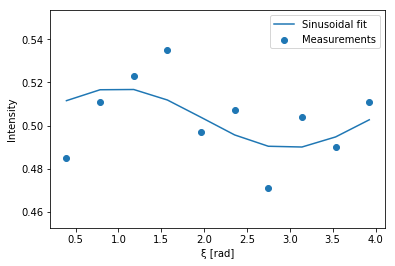

ξ_min :  1.5707963267948966 , I_min :  0.5118393963811432


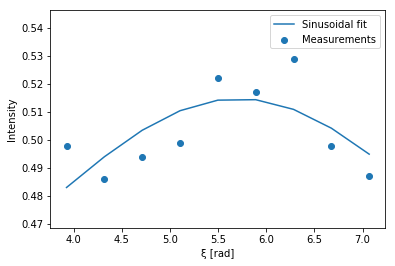

ξ_max :  5.711954213816597 , I_max :  0.514809186663873
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 1.5707963267948966
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 1.5707963267948966


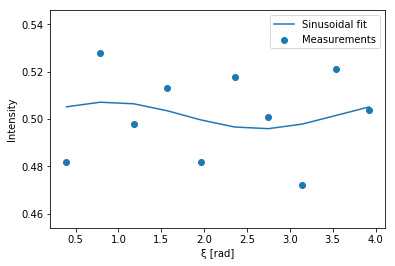

ξ_min :  1.5707963267948966 , I_min :  0.5035046740843552


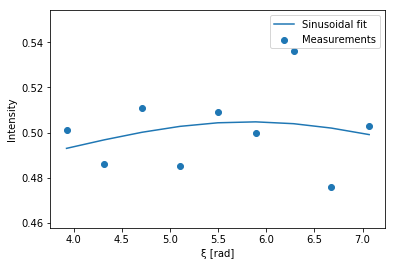

ξ_max :  5.825519929973194 , I_max :  0.5047848958264536
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 1.5707963267948966
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 1.5707963267948966


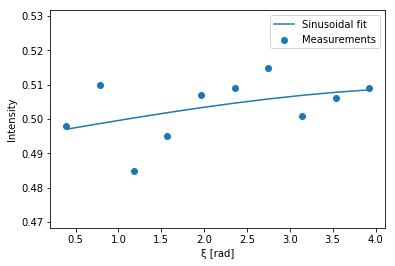

ξ_min :  1.5707963267948966 , I_min :  0.5018656152569337


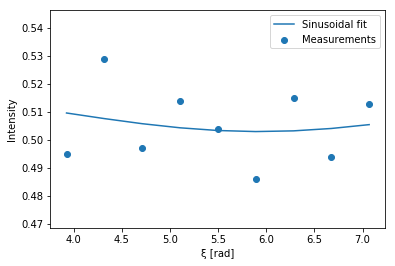

ξ_max :  5.9305972871575685 , I_max :  0.5030385711755025
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 1.5707963267948966
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 1.5707963267948966


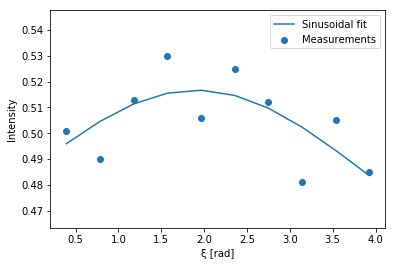

ξ_min :  1.909550287532933 , I_min :  0.5167101379758148


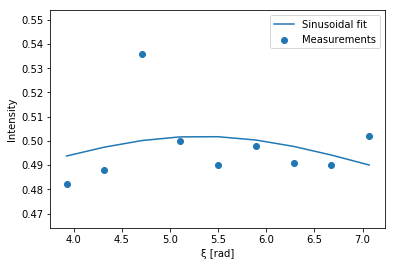

ξ_max :  5.321157084880955 , I_max :  0.5018716287240472
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 1.909550287532933
Point  13 : phi = 0.7853981633974483 , theta = 0 , xi = 1.909550287532933


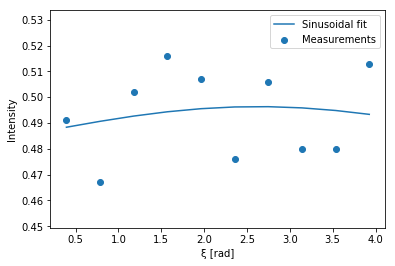

ξ_min :  2.6251518302154433 , I_min :  0.49633344368045834


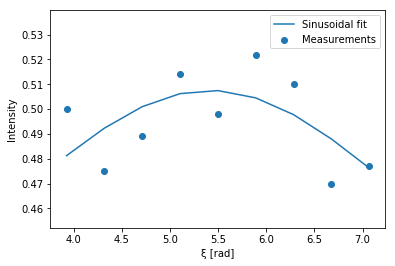

ξ_max :  5.4171722291459705 , I_max :  0.5075638580212096
Point  12 : phi = 0.523599 , theta = 0 , xi = 2.6251518302154433
Point  12 : phi = 0.523599 , theta = 0 , xi = 2.6251518302154433


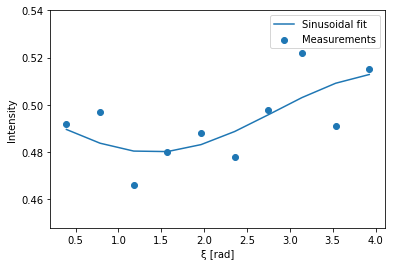

ξ_min :  1.3999471634344764 , I_min :  0.4799468704549746


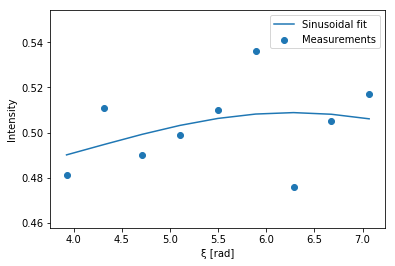

ξ_max :  6.270135549015715 , I_max :  0.5088686497466638
Point  12 : phi = 0.523599 , theta = 0 , xi = 1.3999471634344764
Point  12 : phi = 0.523599 , theta = 0 , xi = 1.3999471634344764


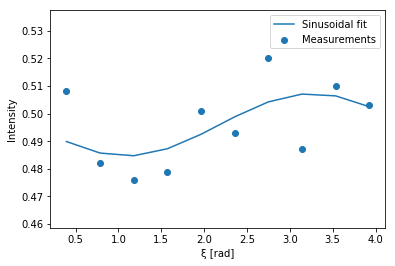

ξ_min :  1.5707963267948966 , I_min :  0.48724945113420204


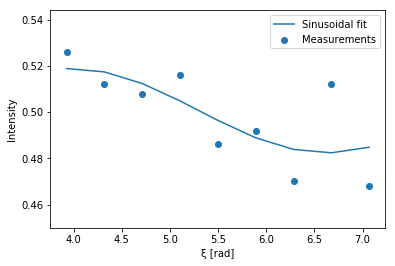

ξ_max :  6.627583426201663 , I_max :  0.4823646383092969
Point  12 : phi = 0.523599 , theta = 0 , xi = 1.5707963267948966
Point  12 : phi = 0.523599 , theta = 0 , xi = 1.5707963267948966


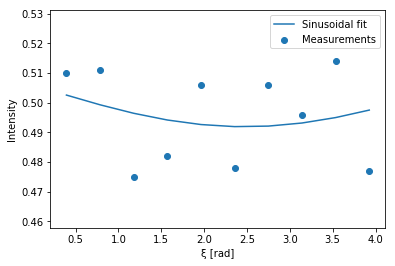

ξ_min :  2.474241220689438 , I_min :  0.4919213358020737


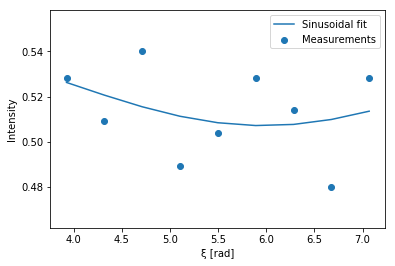

ξ_max :  5.975410519685971 , I_max :  0.5070953019193152
Point  12 : phi = 0.523599 , theta = 0 , xi = 2.474241220689438
Point  12 : phi = 0.523599 , theta = 0 , xi = 2.474241220689438


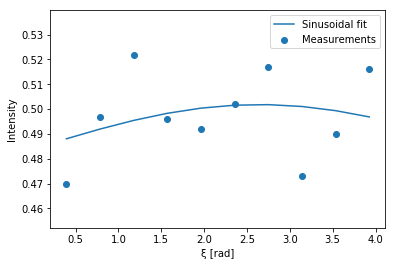

ξ_min :  2.642894846218131 , I_min :  0.5018494308146726


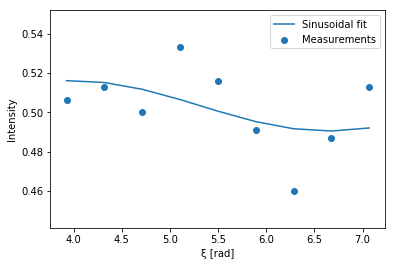

ξ_max :  6.647111491553336 , I_max :  0.4904145014062943
Point  12 : phi = 0.523599 , theta = 0 , xi = 2.642894846218131
Point  12 : phi = 0.523599 , theta = 0 , xi = 2.642894846218131


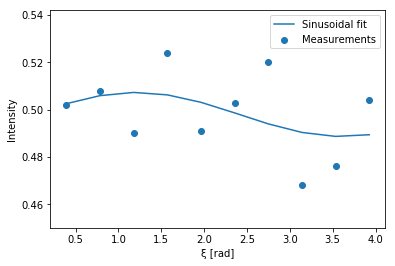

ξ_min :  1.5707963267948966 , I_min :  0.5062359205727253


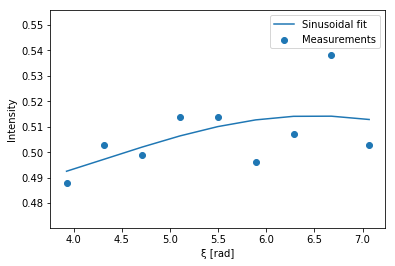

ξ_max :  6.49472188250138 , I_max :  0.5142820377232054
Point  12 : phi = 0.523599 , theta = 0 , xi = 1.5707963267948966
Point  12 : phi = 0.523599 , theta = 0 , xi = 1.5707963267948966


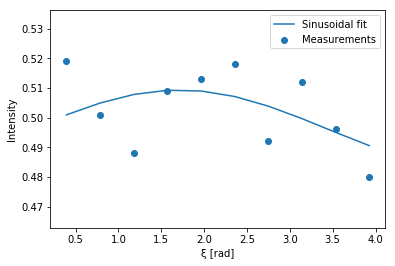

ξ_min :  1.7113629128104075 , I_min :  0.5093077107938548


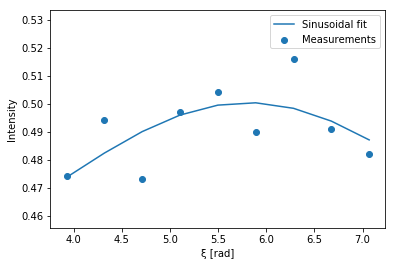

ξ_max :  5.810305085629999 , I_max :  0.5003731992377966
Point  12 : phi = 0.523599 , theta = 0 , xi = 1.7113629128104075
Point  12 : phi = 0.523599 , theta = 0 , xi = 1.7113629128104075


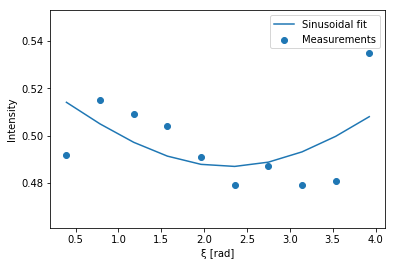

ξ_min :  2.28771059434085 , I_min :  0.4869410167591613


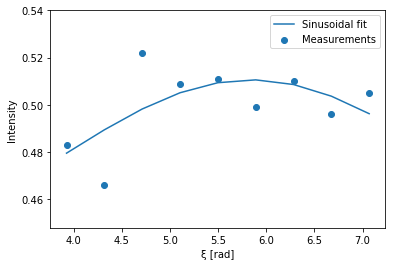

ξ_max :  5.8430554033227375 , I_max :  0.5106059379921689
Point  12 : phi = 0.523599 , theta = 0 , xi = 2.28771059434085
Point  12 : phi = 0.523599 , theta = 0 , xi = 2.28771059434085


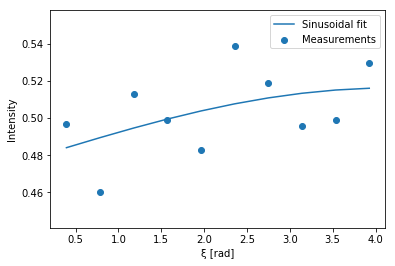

ξ_min :  1.5707963267948966 , I_min :  0.49950864246737586


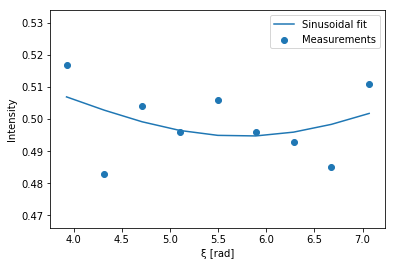

ξ_max :  5.744931992152621 , I_max :  0.49465331941407237
Point  12 : phi = 0.523599 , theta = 0 , xi = 1.5707963267948966
Point  12 : phi = 0.523599 , theta = 0 , xi = 1.5707963267948966


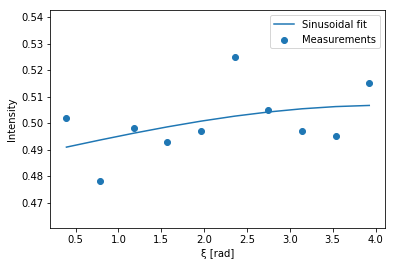

ξ_min :  1.5707963267948966 , I_min :  0.49856206289246574


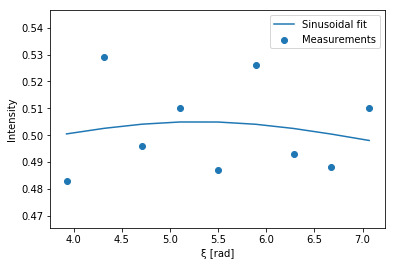

ξ_max :  5.2952064092091415 , I_max :  0.5050180629739252
Point  12 : phi = 0.523599 , theta = 0 , xi = 1.5707963267948966
Point  12 : phi = 0.523599 , theta = 0 , xi = 1.5707963267948966


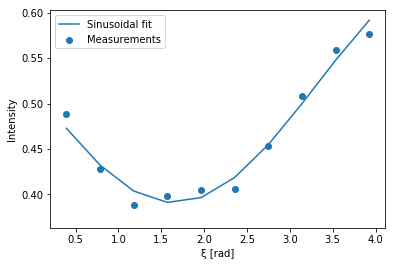

ξ_min :  1.6522890880644212 , I_min :  0.39089179938488283


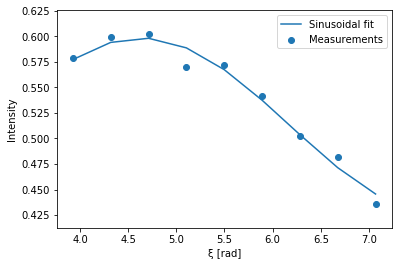

ξ_max :  4.6328477602834734 , I_max :  0.5984104434904955
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.6522890880644212
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.6522890880644212


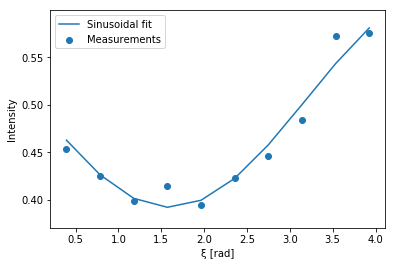

ξ_min :  1.5948756177600203 , I_min :  0.3923409494262774


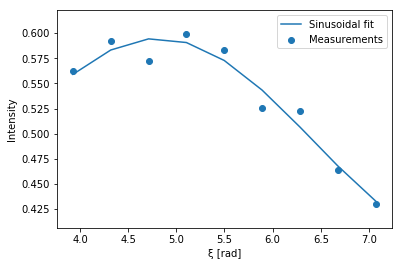

ξ_max :  4.812580119211776 , I_max :  0.5947625354782468
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.5948756177600203
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.5948756177600203


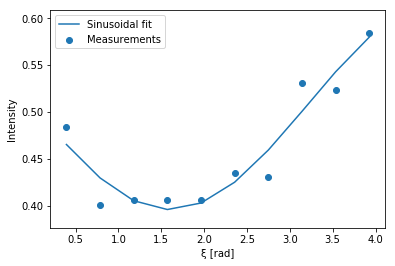

ξ_min :  1.6004935701094278 , I_min :  0.39609575588100837


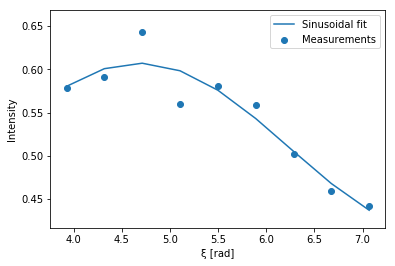

ξ_max :  4.680409475383141 , I_max :  0.6071727989734852
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.6004935701094278
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.6004935701094278


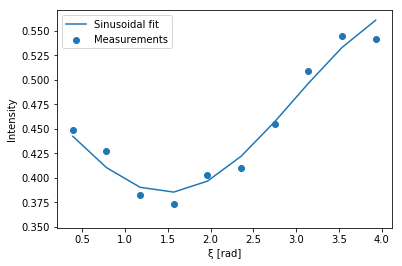

ξ_min :  1.4929254707142894 , I_min :  0.38524769817737625


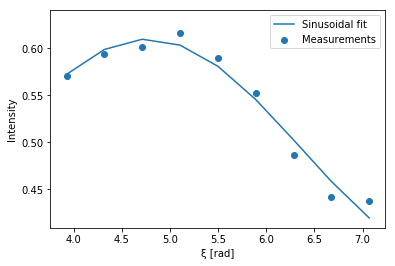

ξ_max :  4.7663944304693 , I_max :  0.6097701395377892
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.4929254707142894
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.4929254707142894


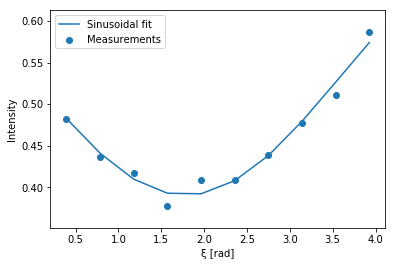

ξ_min :  1.7822591133500834 , I_min :  0.3904440177387226


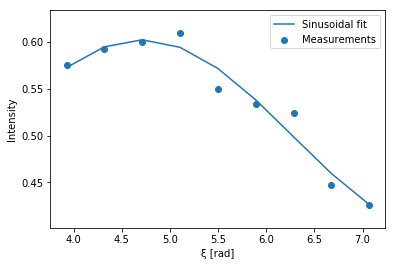

ξ_max :  4.705715397039682 , I_max :  0.6019927314284624
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.7822591133500834
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.7822591133500834


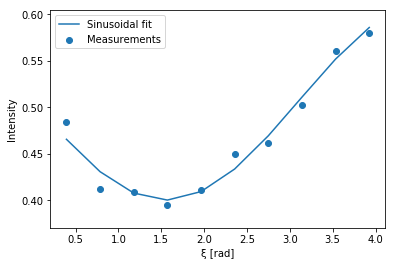

ξ_min :  1.5519778296651483 , I_min :  0.4003733092414932


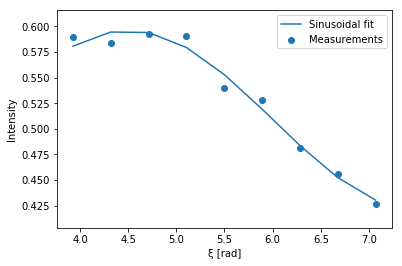

ξ_max :  4.503903896202001 , I_max :  0.5959359764528684
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.5519778296651483
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.5519778296651483


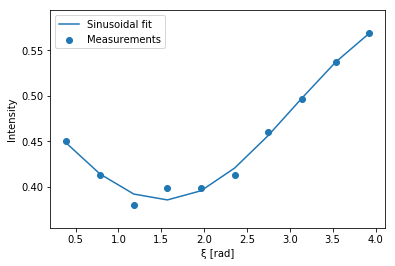

ξ_min :  1.527513506558414 , I_min :  0.38582735450719186


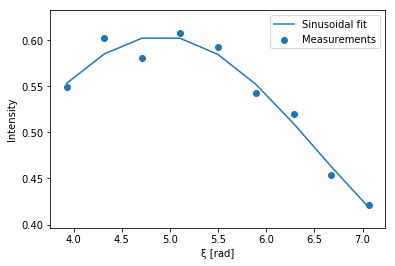

ξ_max :  4.90478045004295 , I_max :  0.6045594682025279
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.527513506558414
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.527513506558414


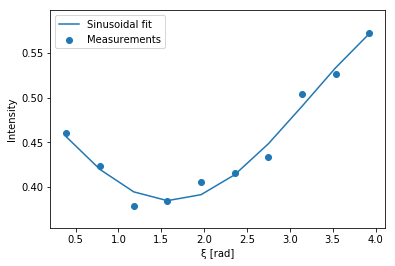

ξ_min :  1.6087063467173122 , I_min :  0.3844721635389791


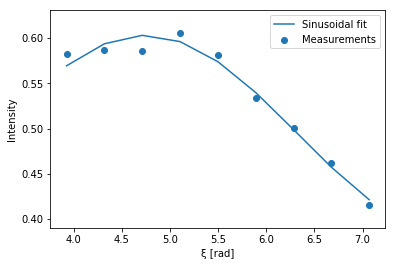

ξ_max :  4.7424951593211775 , I_max :  0.6031735810220387
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.6087063467173122
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.6087063467173122


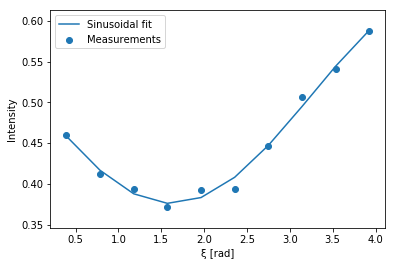

ξ_min :  1.6193842499526563 , I_min :  0.37594428969752025


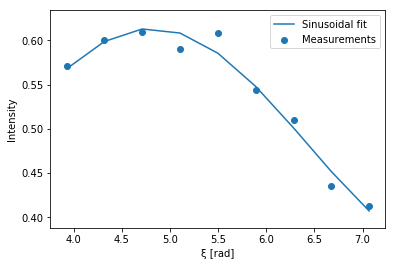

ξ_max :  4.813106822405626 , I_max :  0.6135626673641268
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.6193842499526563
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.6193842499526563


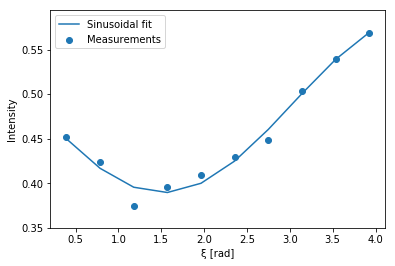

ξ_min :  1.5164266155192867 , I_min :  0.38953215958815823


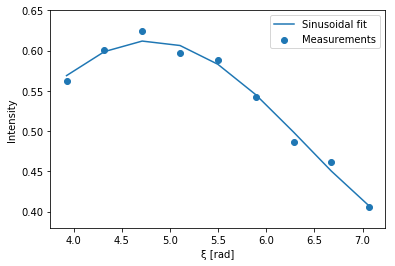

ξ_max :  4.793375766133226 , I_max :  0.6123217979687063
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.5164266155192867
Point  11 : phi = 0.561489 , theta = 0.24 , xi = 1.5164266155192867


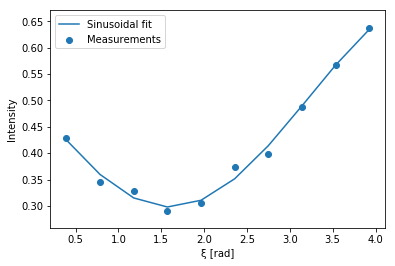

ξ_min :  1.6000353021667961 , I_min :  0.2978178072827108


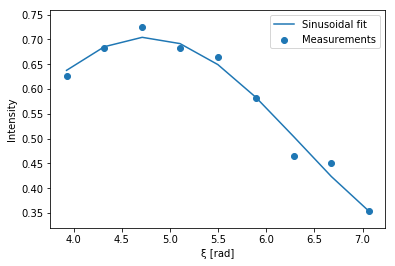

ξ_max :  4.751961080520471 , I_max :  0.7045282478540948
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.6000353021667961
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.6000353021667961


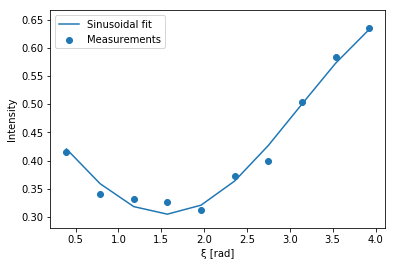

ξ_min :  1.5535234390317123 , I_min :  0.30482702987192967


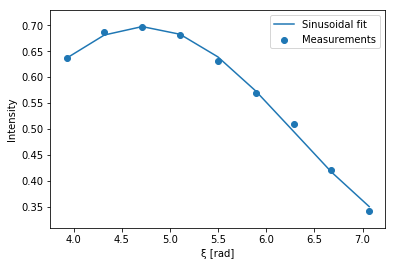

ξ_max :  4.721447675452735 , I_max :  0.6975568639869678
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.5535234390317123
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.5535234390317123


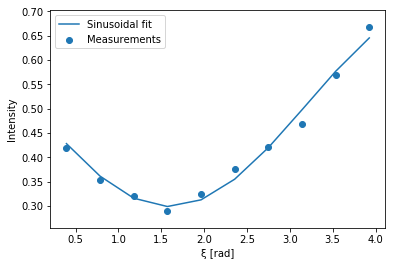

ξ_min :  1.5926841807128596 , I_min :  0.29859484325643626


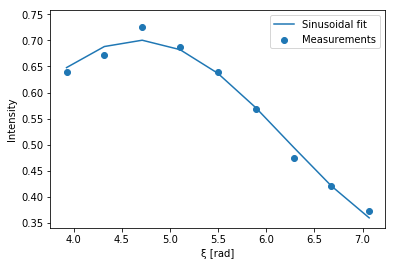

ξ_max :  4.673211224690858 , I_max :  0.7005960481857723
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.5926841807128596
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.5926841807128596


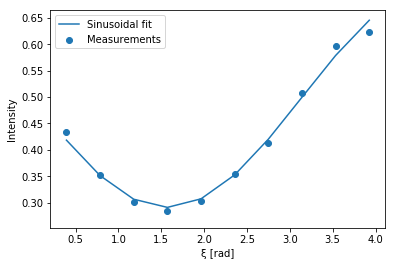

ξ_min :  1.5661870877724164 , I_min :  0.29113328659833915


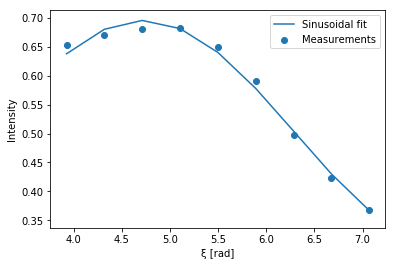

ξ_max :  4.721168039570166 , I_max :  0.6954718871329076
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.5661870877724164
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.5661870877724164


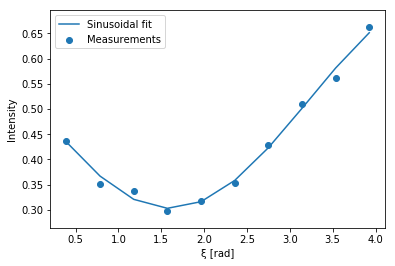

ξ_min :  1.600726521687488 , I_min :  0.3031486454435125


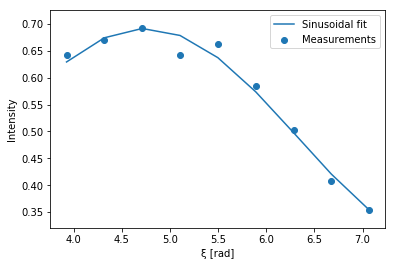

ξ_max :  4.740759449138132 , I_max :  0.6915653128788894
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.600726521687488
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.600726521687488


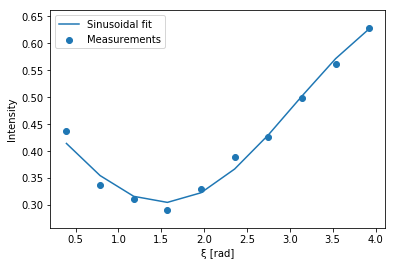

ξ_min :  1.525437577318457 , I_min :  0.304802540496649


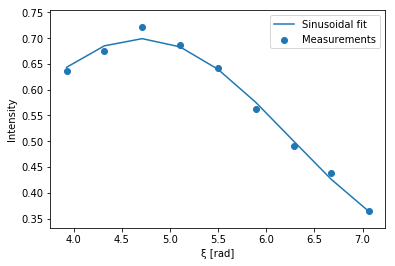

ξ_max :  4.699296806100886 , I_max :  0.6991000235547763
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.525437577318457
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.525437577318457


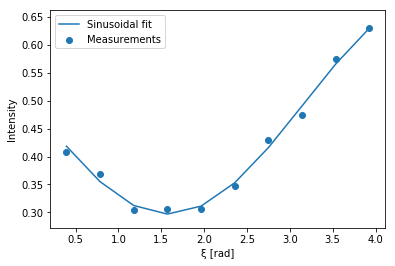

ξ_min :  1.5782380151380513 , I_min :  0.2970279974322726


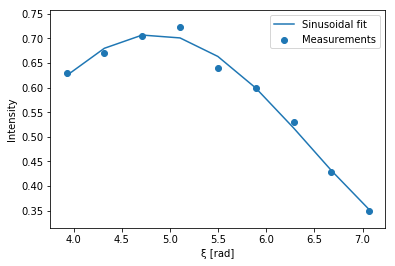

ξ_max :  4.839785969452622 , I_max :  0.7084354176005477
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.5782380151380513
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.5782380151380513


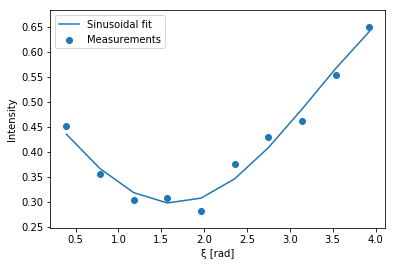

ξ_min :  1.6422974942371251 , I_min :  0.2966022240047893


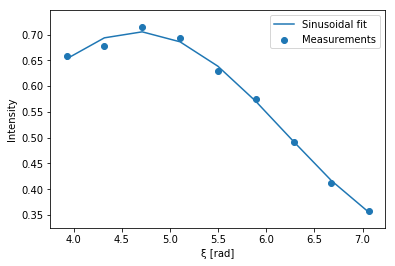

ξ_max :  4.663125479063856 , I_max :  0.70555907105041
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.6422974942371251
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.6422974942371251


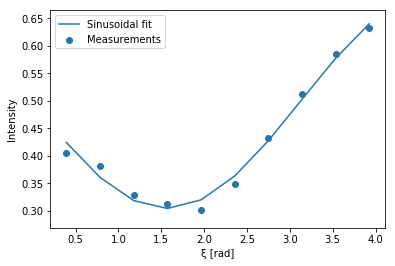

ξ_min :  1.5621648562160986 , I_min :  0.3043405007824227


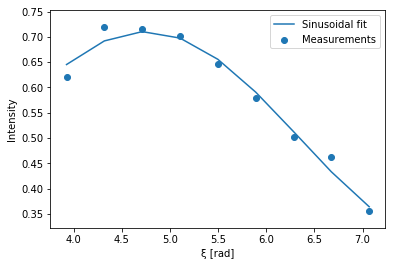

ξ_max :  4.748147111323446 , I_max :  0.7104347124713419
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.5621648562160986
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.5621648562160986


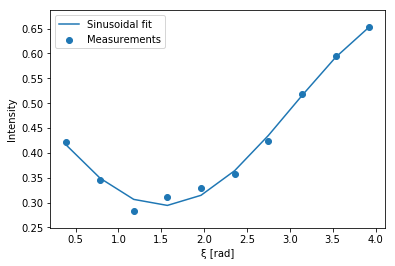

ξ_min :  1.5204459626791265 , I_min :  0.2940745368116324


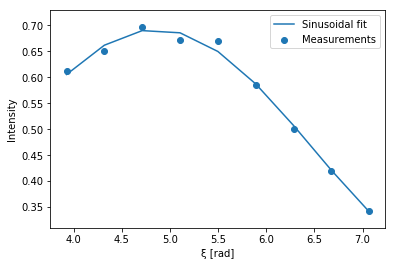

ξ_max :  4.858395984849413 , I_max :  0.6921042238136814
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.5204459626791265
Point  10 : phi = 0.659058 , theta = 0.43 , xi = 1.5204459626791265


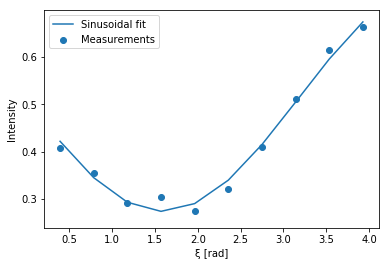

ξ_min :  1.58679332402057 , I_min :  0.274041618179561


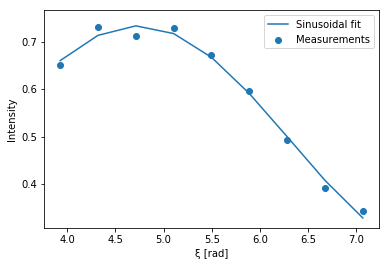

ξ_max :  4.733150857432719 , I_max :  0.7330330072831681
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.58679332402057
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.58679332402057


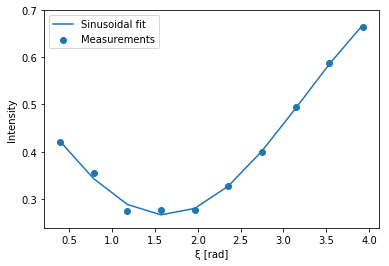

ξ_min :  1.6177356651621084 , I_min :  0.2654832939296383


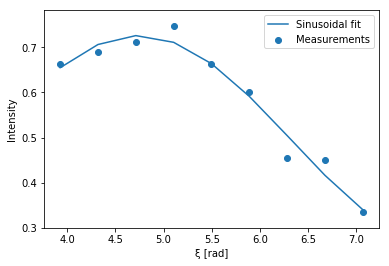

ξ_max :  4.740295980505562 , I_max :  0.7258891776568502
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.6177356651621084
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.6177356651621084


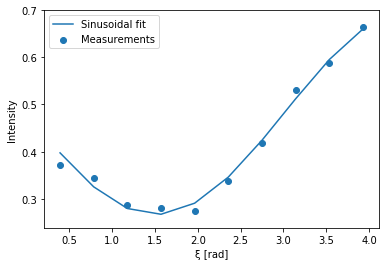

ξ_min :  1.508117655285946 , I_min :  0.2664775381897189


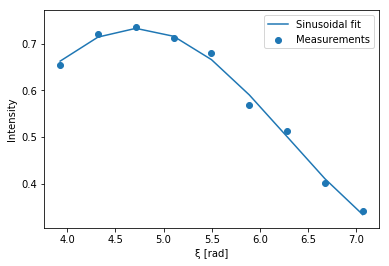

ξ_max :  4.721956842501661 , I_max :  0.7333896464563318
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.508117655285946
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.508117655285946


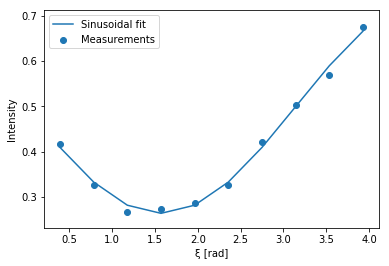

ξ_min :  1.5707315007521712 , I_min :  0.26429290396473937


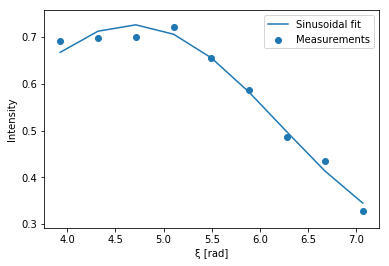

ξ_max :  4.674010206618406 , I_max :  0.7261595158461566
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.5707315007521712
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.5707315007521712


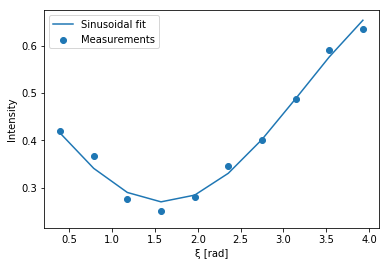

ξ_min :  1.6035769946814156 , I_min :  0.2700271126822893


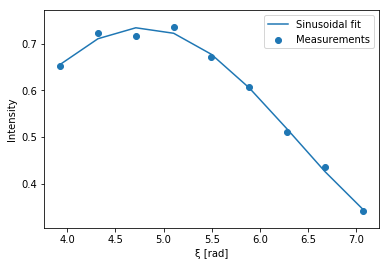

ξ_max :  4.778262564244071 , I_max :  0.7351208525916415
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.6035769946814156
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.6035769946814156


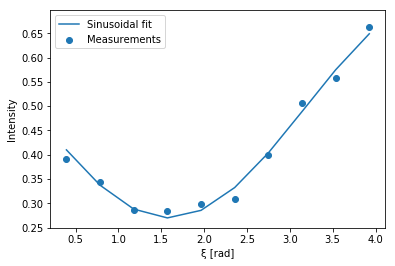

ξ_min :  1.5860763802580047 , I_min :  0.26989324825175215


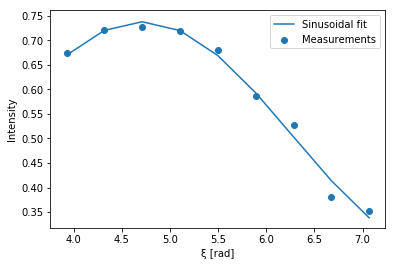

ξ_max :  4.710002962551843 , I_max :  0.7377327160955778
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.5860763802580047
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.5860763802580047


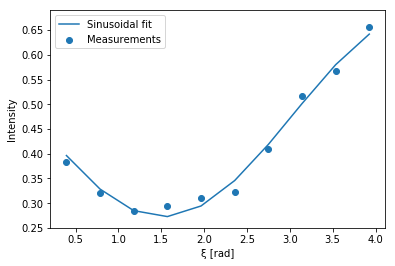

ξ_min :  1.5148550576983562 , I_min :  0.27255649034635854


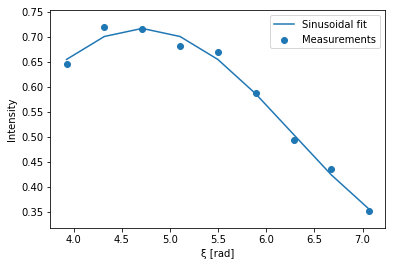

ξ_max :  4.712308717563672 , I_max :  0.7164822777934987
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.5148550576983562
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.5148550576983562


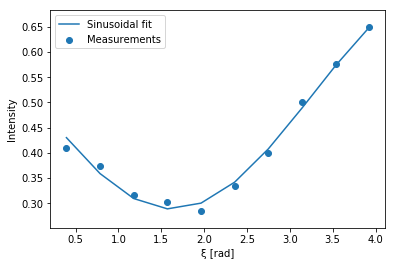

ξ_min :  1.6275614487914423 , I_min :  0.28879857501935957


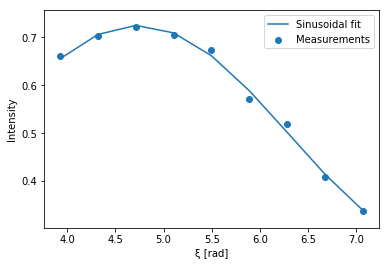

ξ_max :  4.731133542492209 , I_max :  0.7250783519099079
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.6275614487914423
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.6275614487914423


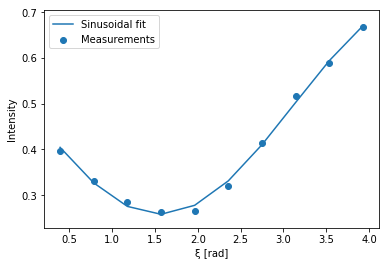

ξ_min :  1.5580185357611975 , I_min :  0.2581231086116631


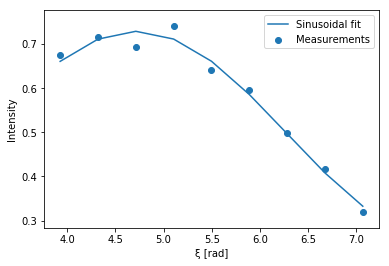

ξ_max :  4.7132282349982475 , I_max :  0.7287840025757584
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.5580185357611975
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.5580185357611975


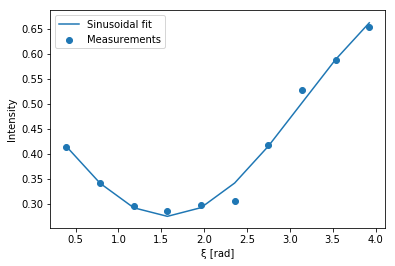

ξ_min :  1.5692839878122298 , I_min :  0.2753391951240637


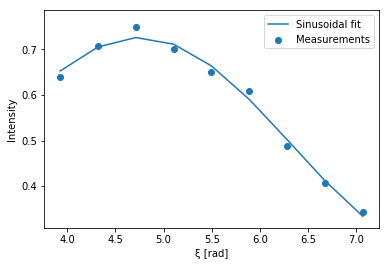

ξ_max :  4.7465546957188085 , I_max :  0.7260029533912269
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.5692839878122298
Point  9 : phi = 0.7853981633974483 , theta = 0.47 , xi = 1.5692839878122298


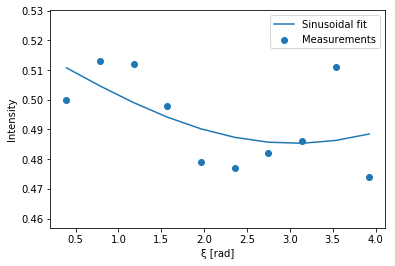

ξ_min :  3.0539908436314143 , I_min :  0.48532439445334846


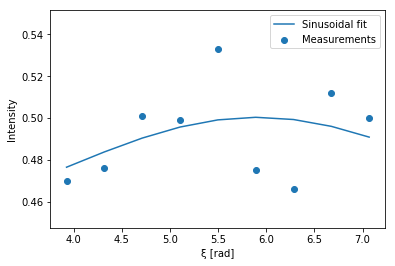

ξ_max :  5.905850990992753 , I_max :  0.500359836898161
Point  8 : phi = 0.261825 , theta = 0 , xi = 3.0539908436314143
Point  8 : phi = 0.261825 , theta = 0 , xi = 3.0539908436314143


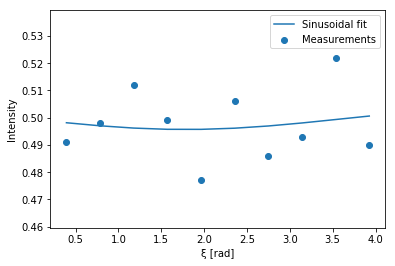

ξ_min :  1.7803622228980238 , I_min :  0.4956794753144911


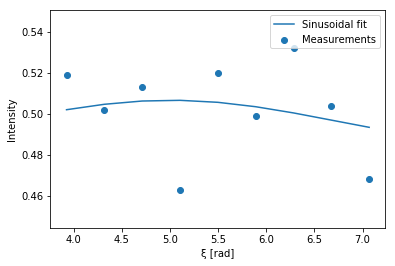

ξ_max :  5.00900599016982 , I_max :  0.5067033847709191
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.7803622228980238
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.7803622228980238


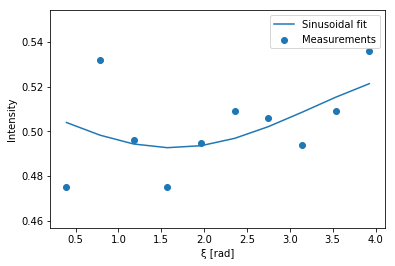

ξ_min :  1.630342308426202 , I_min :  0.49265168739429205


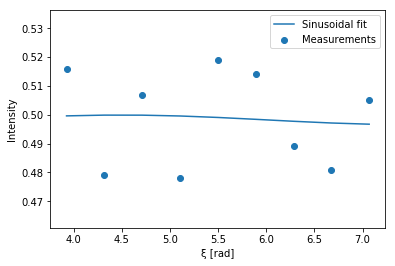

ξ_max :  4.497150629626114 , I_max :  0.4999006470355758
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.630342308426202
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.630342308426202


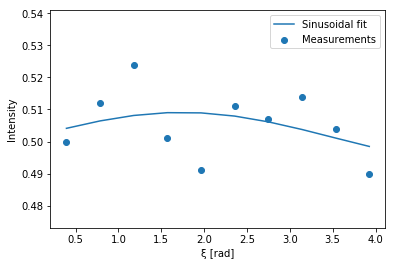

ξ_min :  1.7394834660682748 , I_min :  0.509085268205023


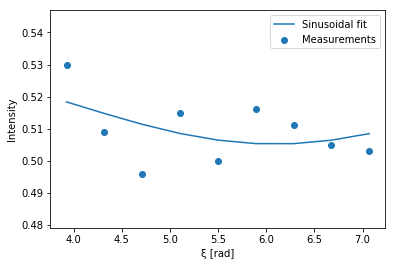

ξ_max :  6.090968720027417 , I_max :  0.5052154734880773
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.7394834660682748
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.7394834660682748


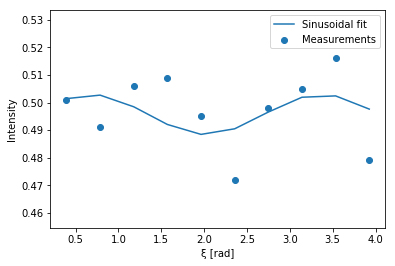

ξ_min :  0.674070554978009 , I_min :  0.5029195644762923


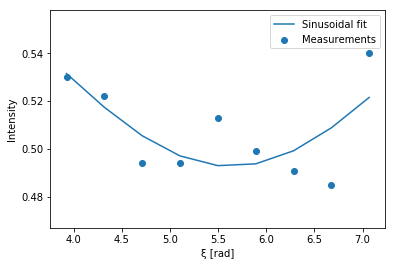

ξ_max :  5.634353149252242 , I_max :  0.49275238999898685
Point  8 : phi = 0.261825 , theta = 0 , xi = 0.674070554978009
Point  8 : phi = 0.261825 , theta = 0 , xi = 0.674070554978009


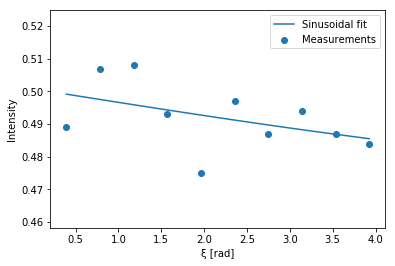

ξ_min :  1.5707963267948966 , I_min :  0.4942939375252409


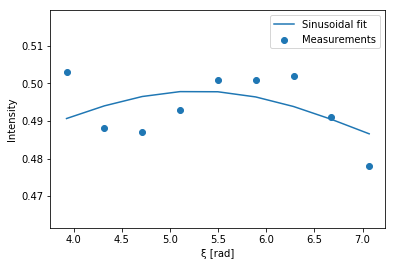

ξ_max :  5.290356097773473 , I_max :  0.49795927520864625
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.5707963267948966
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.5707963267948966


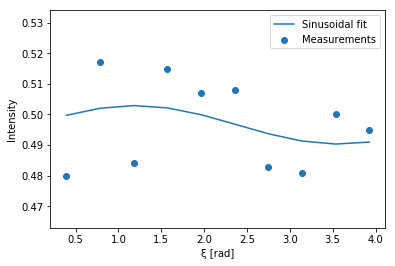

ξ_min :  1.5707963267948966 , I_min :  0.5021499637490596


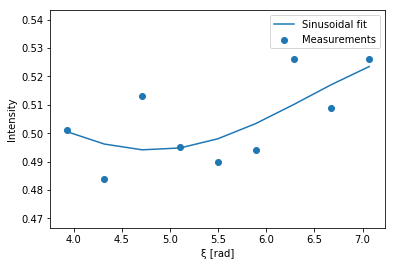

ξ_max :  4.814322032513523 , I_max :  0.4940855306565125
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.5707963267948966
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.5707963267948966


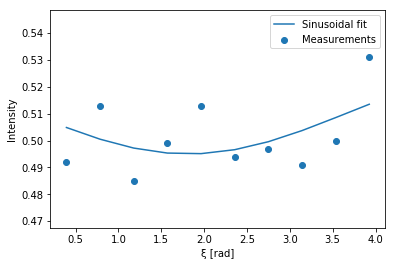

ξ_min :  1.815950532566516 , I_min :  0.49501406996503283


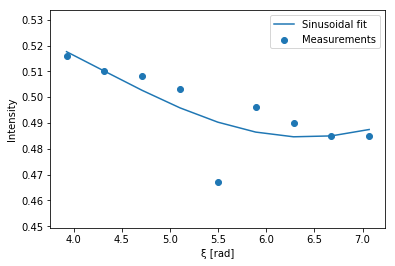

ξ_max :  6.417930975405231 , I_max :  0.4845074464418163
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.815950532566516
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.815950532566516


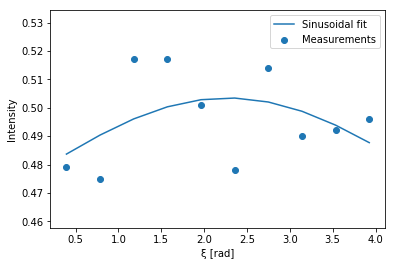

ξ_min :  2.275048123624843 , I_min :  0.5034463603257398


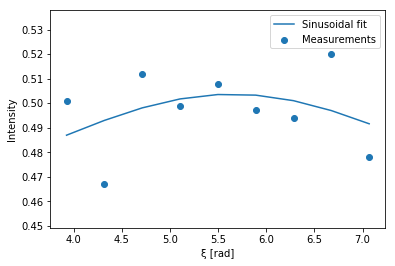

ξ_max :  5.647522891592856 , I_max :  0.5036621218504824
Point  8 : phi = 0.261825 , theta = 0 , xi = 2.275048123624843
Point  8 : phi = 0.261825 , theta = 0 , xi = 2.275048123624843


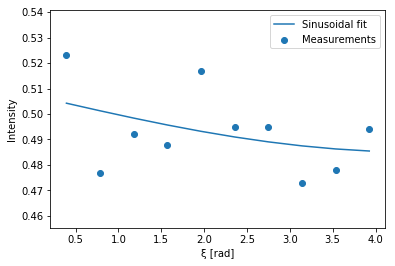

ξ_min :  1.5707963267948966 , I_min :  0.49568141077713707


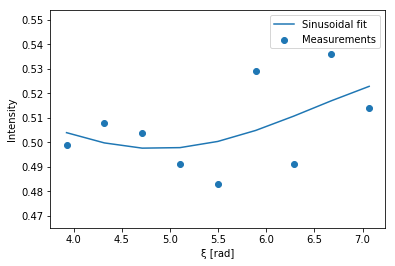

ξ_max :  4.874125605739555 , I_max :  0.49744792760632417
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.5707963267948966
Point  8 : phi = 0.261825 , theta = 0 , xi = 1.5707963267948966


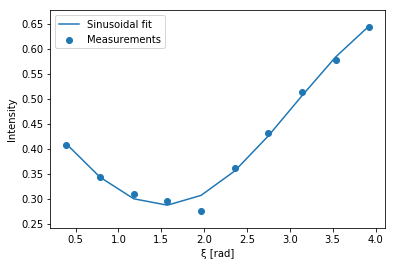

ξ_min :  1.5292579148962104 , I_min :  0.28656911259239914


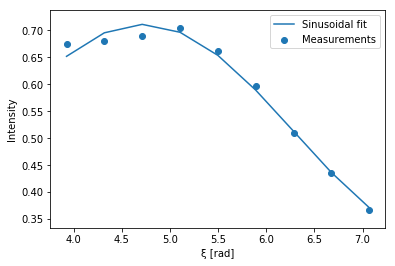

ξ_max :  4.71893515178258 , I_max :  0.7111843974890936
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.5292579148962104
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.5292579148962104


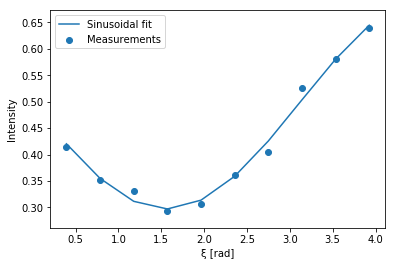

ξ_min :  1.556706124787628 , I_min :  0.2970938179866298


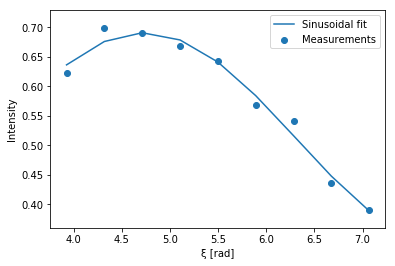

ξ_max :  4.731713050374271 , I_max :  0.6906748530750438
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.556706124787628
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.556706124787628


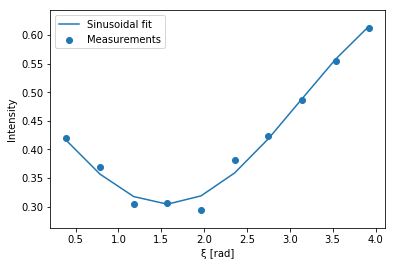

ξ_min :  1.5619795009186055 , I_min :  0.3041904669504295


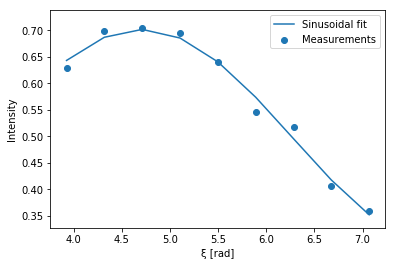

ξ_max :  4.703262150106789 , I_max :  0.7015583355909084
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.5619795009186055
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.5619795009186055


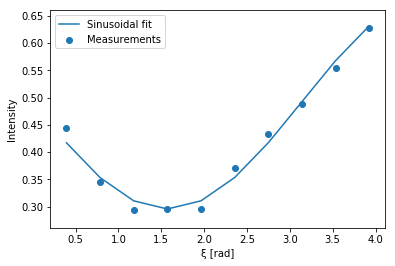

ξ_min :  1.5703467540217875 , I_min :  0.2955688364124867


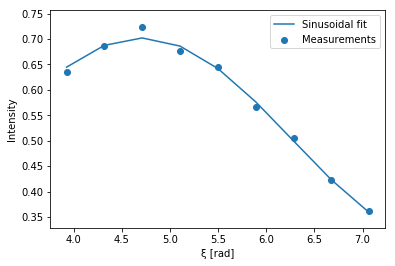

ξ_max :  4.703170853186769 , I_max :  0.7020155516332423
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.5703467540217875
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.5703467540217875


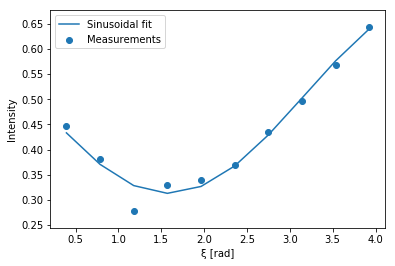

ξ_min :  1.5825462413371632 , I_min :  0.31299447509251027


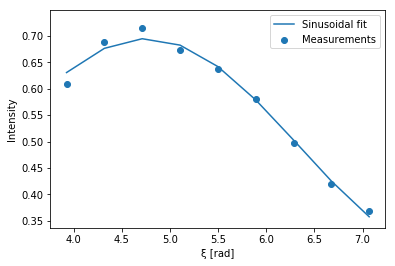

ξ_max :  4.752621957952059 , I_max :  0.6949429934513921
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.5825462413371632
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.5825462413371632


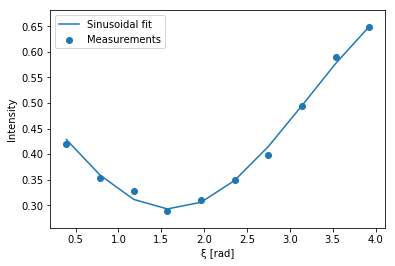

ξ_min :  1.6057465055033886 , I_min :  0.29263436723513636


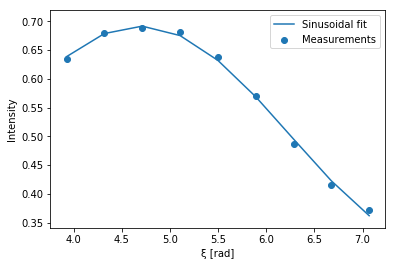

ξ_max :  4.688831770462399 , I_max :  0.6916028952478407
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.6057465055033886
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.6057465055033886


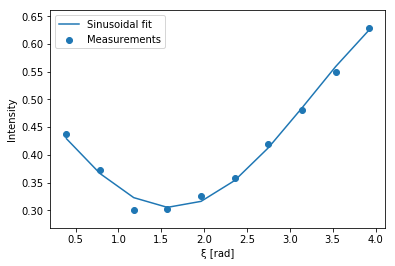

ξ_min :  1.6178800119235073 , I_min :  0.3050395370667737


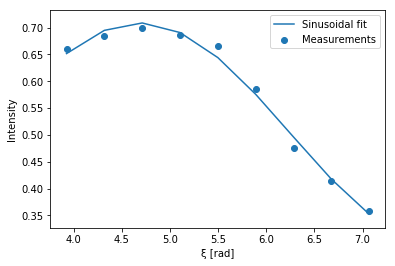

ξ_max :  4.686852663528008 , I_max :  0.7088006184618385
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.6178800119235073
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.6178800119235073


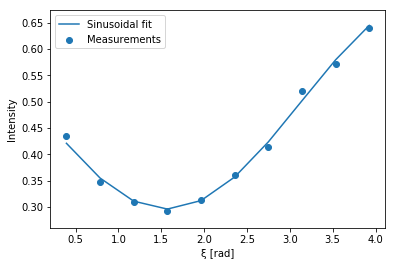

ξ_min :  1.5638044328597631 , I_min :  0.2959685883141233


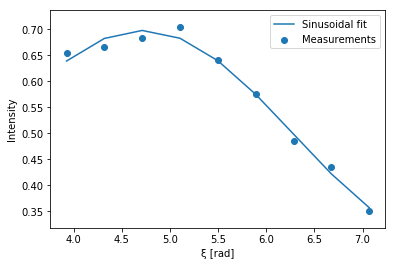

ξ_max :  4.714689098240788 , I_max :  0.698153435841968
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.5638044328597631
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.5638044328597631


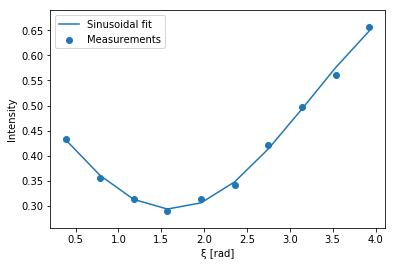

ξ_min :  1.614277549339896 , I_min :  0.29369662549172915


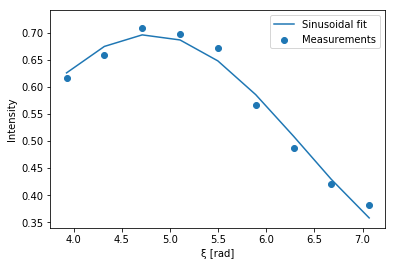

ξ_max :  4.789730221976886 , I_max :  0.696404602421719
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.614277549339896
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.614277549339896


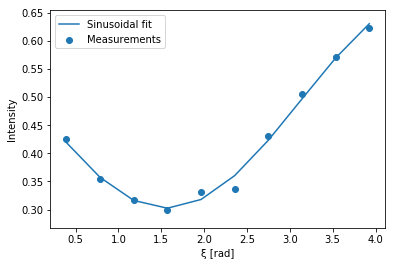

ξ_min :  1.5592768228167164 , I_min :  0.3024356060097039


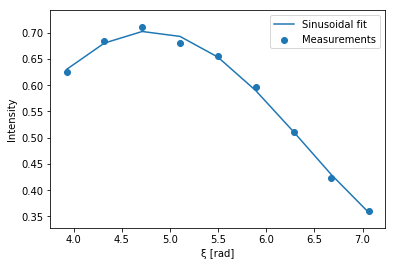

ξ_max :  4.792508522099292 , I_max :  0.703028319653977
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.5592768228167164
Point  7 : phi = 0.36 , theta = 0.65 , xi = 1.5592768228167164


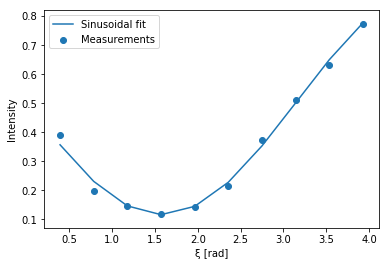

ξ_min :  1.5763476902964353 , I_min :  0.1163257446981355


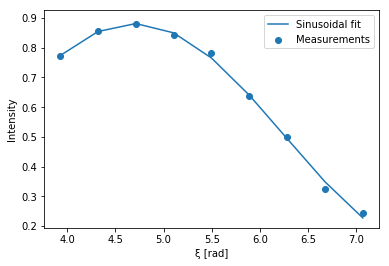

ξ_max :  4.697107235808593 , I_max :  0.8817192624517951
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.5763476902964353
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.5763476902964353


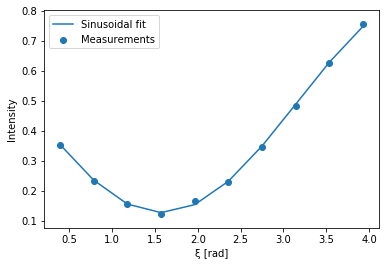

ξ_min :  1.5783600177088715 , I_min :  0.12677603552054906


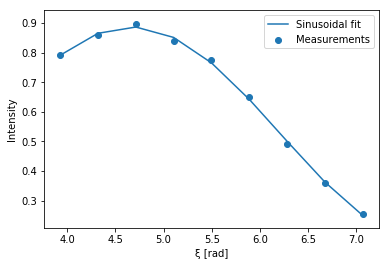

ξ_max :  4.663041655317665 , I_max :  0.8863358508338259
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.5783600177088715
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.5783600177088715


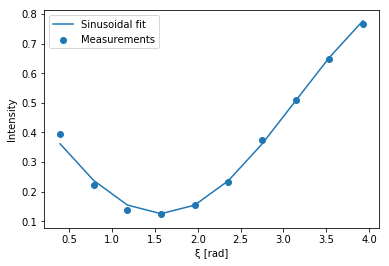

ξ_min :  1.572429461753109 , I_min :  0.12548340604786629


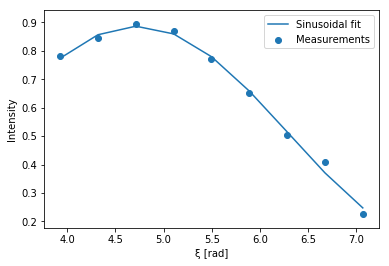

ξ_max :  4.722491649892397 , I_max :  0.8868796320203796
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.572429461753109
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.572429461753109


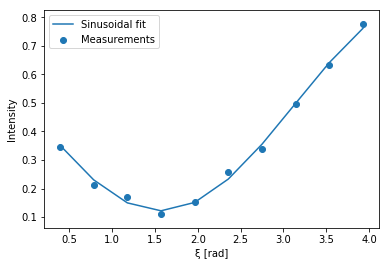

ξ_min :  1.565403459011687 , I_min :  0.1221261170028265


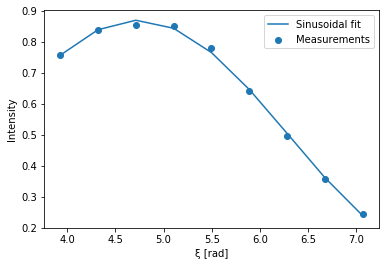

ξ_max :  4.728895163171729 , I_max :  0.8694417390799827
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.565403459011687
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.565403459011687


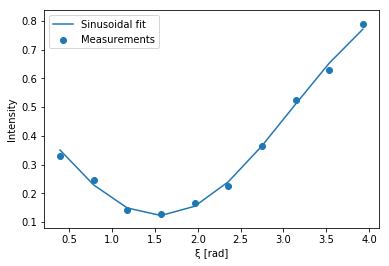

ξ_min :  1.5502574068655797 , I_min :  0.12253935477733868


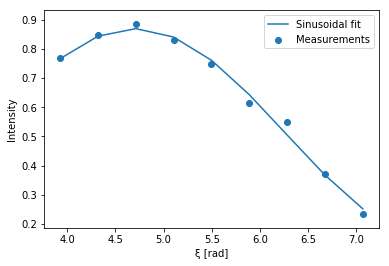

ξ_max :  4.70145227902322 , I_max :  0.869150868413215
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.5502574068655797
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.5502574068655797


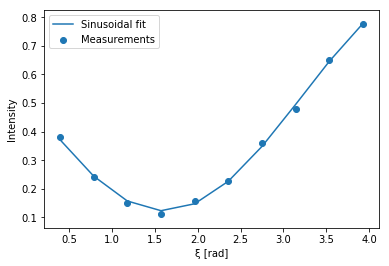

ξ_min :  1.6037961623968657 , I_min :  0.12326191844319612


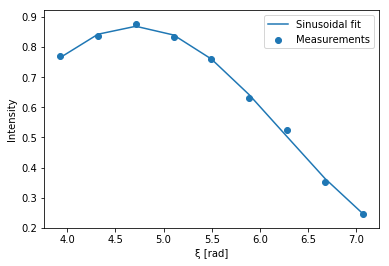

ξ_max :  4.7028351463158735 , I_max :  0.8688031768346438
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.6037961623968657
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.6037961623968657


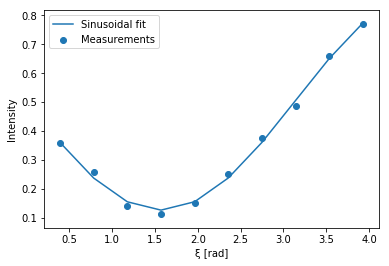

ξ_min :  1.5701020816185332 , I_min :  0.12709457465528745


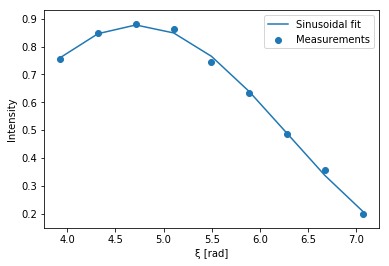

ξ_max :  4.721308439041143 , I_max :  0.8777917170489151
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.5701020816185332
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.5701020816185332


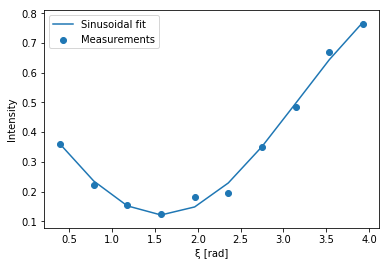

ξ_min :  1.583131904318714 , I_min :  0.12106017151938941


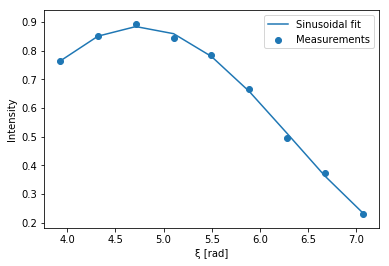

ξ_max :  4.7416040700172974 , I_max :  0.8839104992788325
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.583131904318714
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.583131904318714


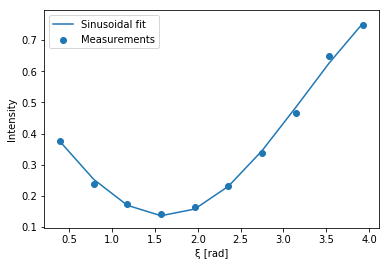

ξ_min :  1.614733188912396 , I_min :  0.13591098132296991


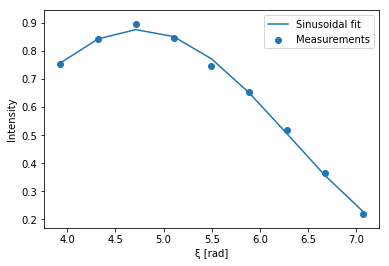

ξ_max :  4.74105672033459 , I_max :  0.8765644558481096
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.614733188912396
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.614733188912396


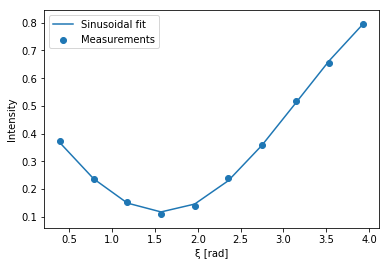

ξ_min :  1.5825960830136385 , I_min :  0.11776079852898752


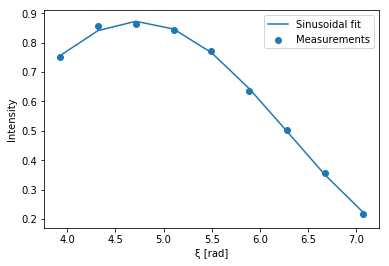

ξ_max :  4.730828353050851 , I_max :  0.8733395379879801
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.5825960830136385
Point  6 : phi = 0.561489 , theta = 0.989 , xi = 1.5825960830136385


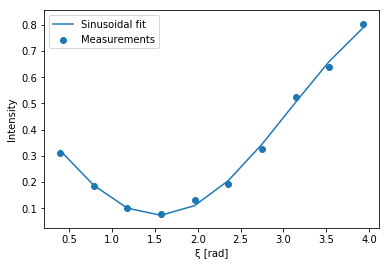

ξ_min :  1.540748648985136 , I_min :  0.07297372643677968


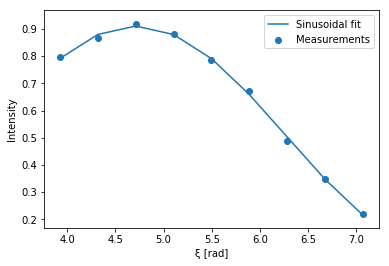

ξ_max :  4.710661928874247 , I_max :  0.9104656826458993
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.540748648985136
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.540748648985136


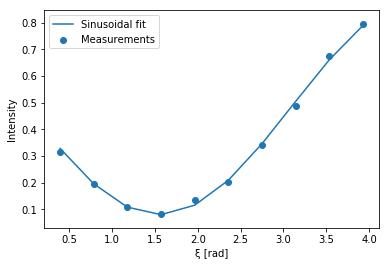

ξ_min :  1.5484387841809475 , I_min :  0.0793407646067642


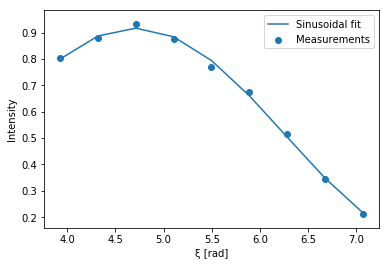

ξ_max :  4.702433785442477 , I_max :  0.91681049442358
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5484387841809475
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5484387841809475


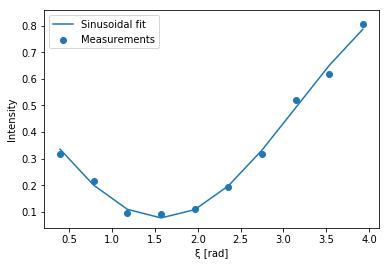

ξ_min :  1.5754588682916544 , I_min :  0.07793168745281454


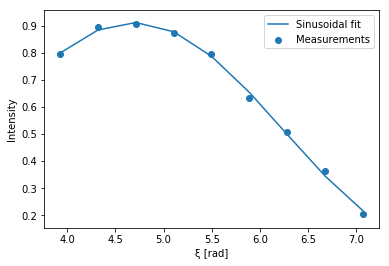

ξ_max :  4.691588184030668 , I_max :  0.9115379775612367
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5754588682916544
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5754588682916544


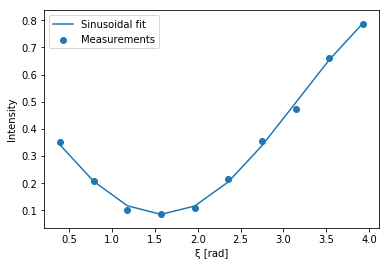

ξ_min :  1.5742445270466132 , I_min :  0.08509411073313594


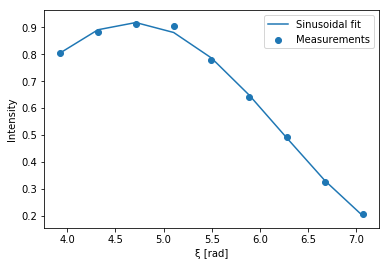

ξ_max :  4.680638913376478 , I_max :  0.9174807591049687
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5742445270466132
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5742445270466132


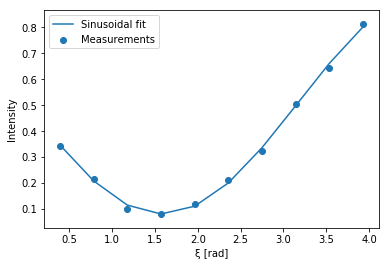

ξ_min :  1.5838692110617683 , I_min :  0.08132127749577861


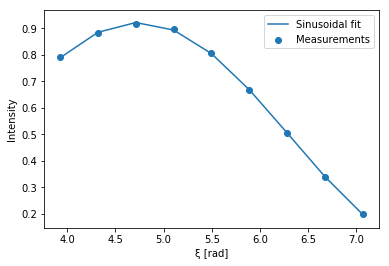

ξ_max :  4.738186084875261 , I_max :  0.9222550294511
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5838692110617683
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5838692110617683


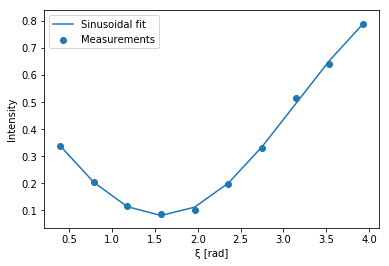

ξ_min :  1.5764105423743726 , I_min :  0.08127781424493208


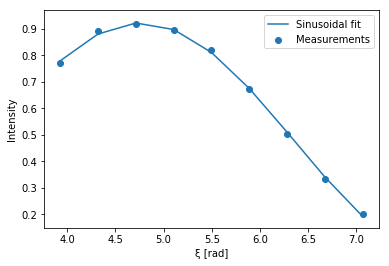

ξ_max :  4.7638951441710065 , I_max :  0.9228536101295826
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5764105423743726
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5764105423743726


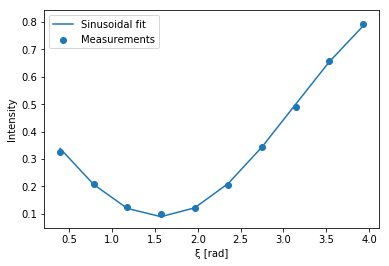

ξ_min :  1.5640257973778544 , I_min :  0.08874785044605782


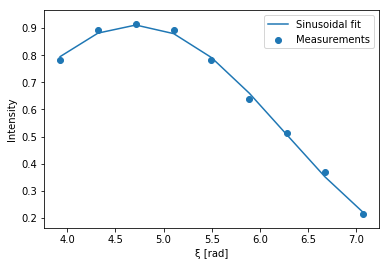

ξ_max :  4.706091871838214 , I_max :  0.9111723096106803
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5640257973778544
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5640257973778544


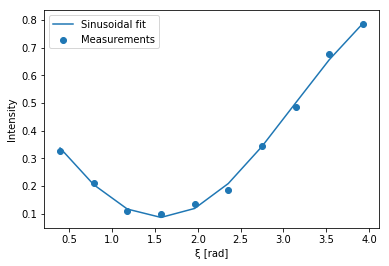

ξ_min :  1.5636144128935052 , I_min :  0.0859405550691077


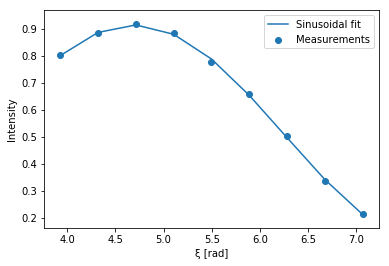

ξ_max :  4.690833610807244 , I_max :  0.9135346995869935
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5636144128935052
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5636144128935052


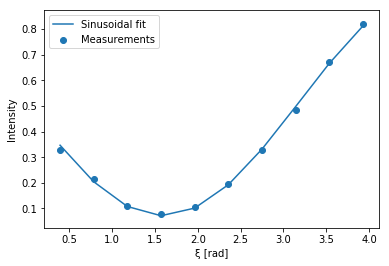

ξ_min :  1.59005836160154 , I_min :  0.07165530492371813


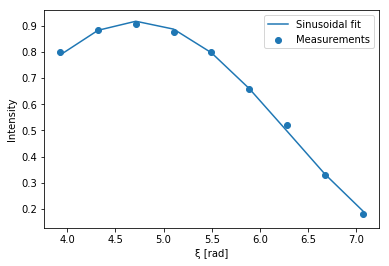

ξ_max :  4.726193373799043 , I_max :  0.9170329318161781
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.59005836160154
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.59005836160154


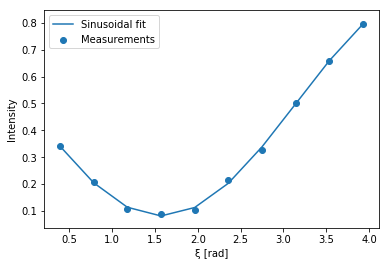

ξ_min :  1.5738895610646533 , I_min :  0.0815316740101295


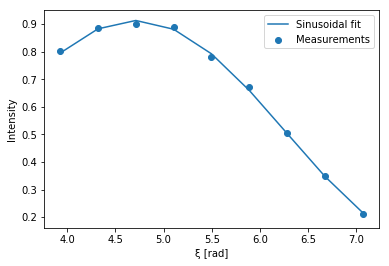

ξ_max :  4.707578249876943 , I_max :  0.9129823873889196
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5738895610646533
Point  5 : phi = 0.7853981633974483 , theta = 0.9817 , xi = 1.5738895610646533


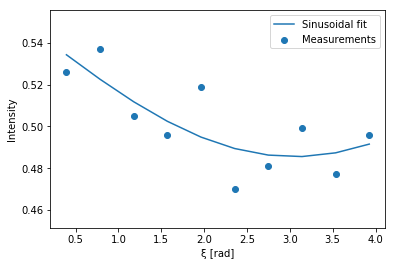

ξ_min :  3.05566099162983 , I_min :  0.48550652653153203


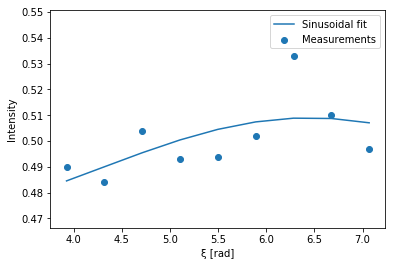

ξ_max :  6.449934202881909 , I_max :  0.5089941741036877
Point  4 : phi = 0 , theta = 0 , xi = 3.05566099162983
Point  4 : phi = 0 , theta = 0 , xi = 3.05566099162983


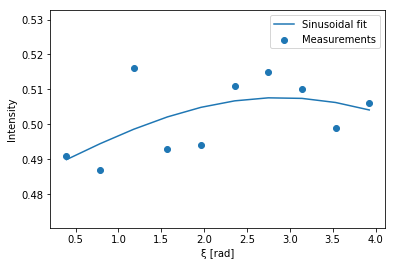

ξ_min :  2.8845954561603615 , I_min :  0.5076441567344585


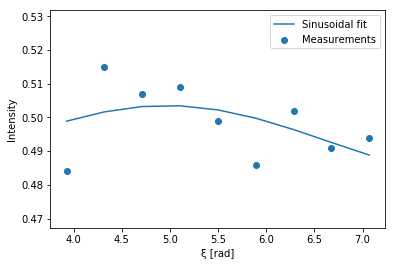

ξ_max :  4.965339406200852 , I_max :  0.503524594882988
Point  4 : phi = 0 , theta = 0 , xi = 2.8845954561603615
Point  4 : phi = 0 , theta = 0 , xi = 2.8845954561603615


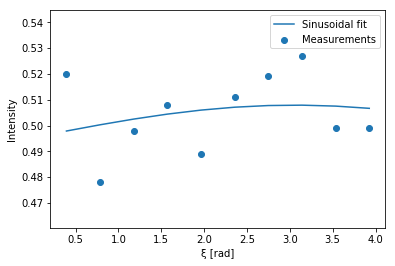

ξ_min :  3.055357341118486 , I_min :  0.5079043714922588


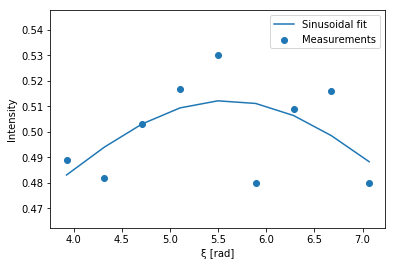

ξ_max :  5.5885314695046135 , I_max :  0.5122669687339481
Point  4 : phi = 0 , theta = 0 , xi = 3.055357341118486
Point  4 : phi = 0 , theta = 0 , xi = 3.055357341118486


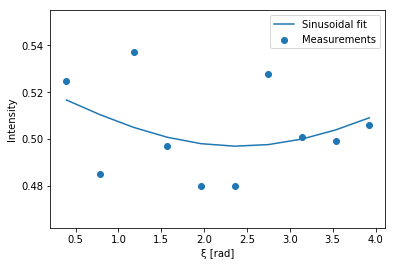

ξ_min :  2.400928910611328 , I_min :  0.4968956379811021


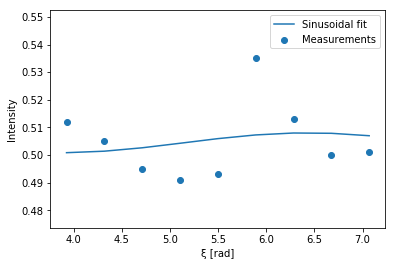

ξ_max :  6.430437036978781 , I_max :  0.5080115342846554
Point  4 : phi = 0 , theta = 0 , xi = 2.400928910611328
Point  4 : phi = 0 , theta = 0 , xi = 2.400928910611328


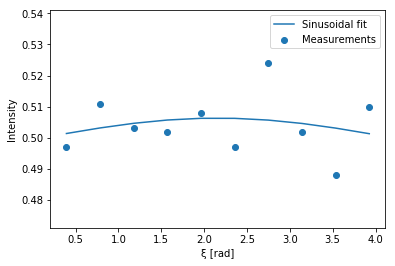

ξ_min :  2.153778011406758 , I_min :  0.50631359330202


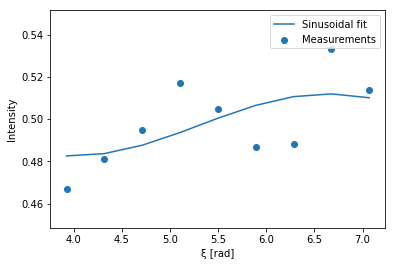

ξ_max :  6.642851787430338 , I_max :  0.511934981508174
Point  4 : phi = 0 , theta = 0 , xi = 2.153778011406758
Point  4 : phi = 0 , theta = 0 , xi = 2.153778011406758


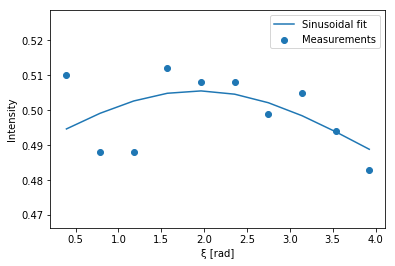

ξ_min :  1.9309737827202327 , I_min :  0.5055687813736129


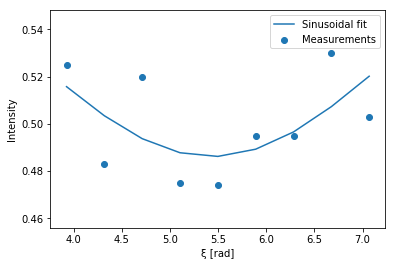

ξ_max :  5.432874798167863 , I_max :  0.4861506583857539
Point  4 : phi = 0 , theta = 0 , xi = 1.9309737827202327
Point  4 : phi = 0 , theta = 0 , xi = 1.9309737827202327


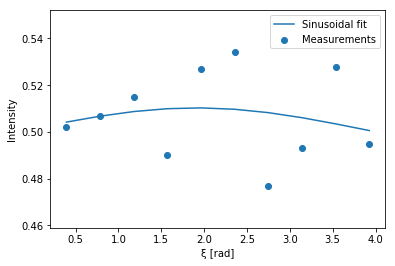

ξ_min :  1.9100150466710115 , I_min :  0.5102924314380984


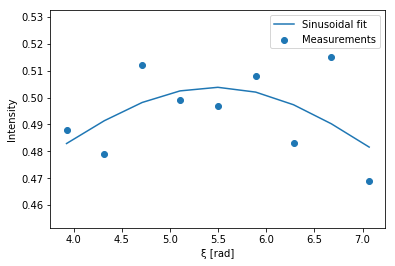

ξ_max :  5.46922813482174 , I_max :  0.5038374650449494
Point  4 : phi = 0 , theta = 0 , xi = 1.9100150466710115
Point  4 : phi = 0 , theta = 0 , xi = 1.9100150466710115


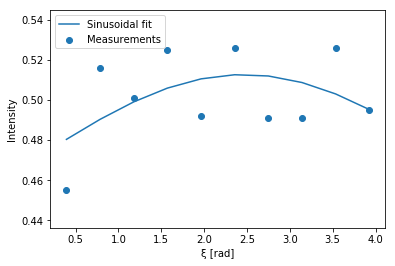

ξ_min :  2.4622433550281326 , I_min :  0.5127139123709041


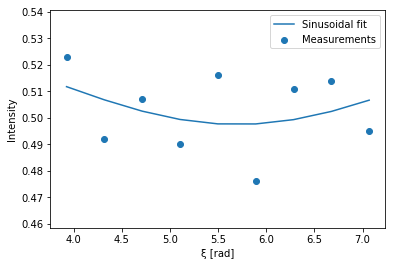

ξ_max :  5.699683199159267 , I_max :  0.4974666795222152
Point  4 : phi = 0 , theta = 0 , xi = 2.4622433550281326
Point  4 : phi = 0 , theta = 0 , xi = 2.4622433550281326


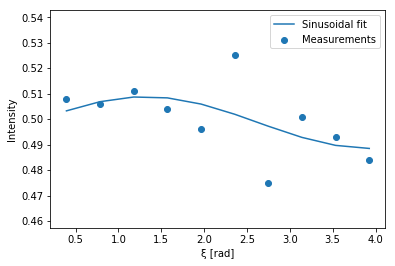

ξ_min :  1.5707963267948966 , I_min :  0.5083260253772532


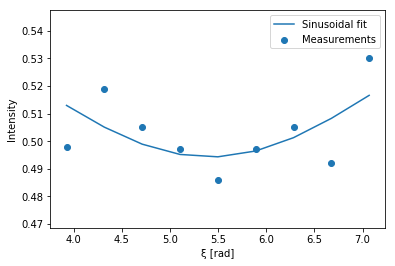

ξ_max :  5.414481199011264 , I_max :  0.4942637012771001
Point  4 : phi = 0 , theta = 0 , xi = 1.5707963267948966
Point  4 : phi = 0 , theta = 0 , xi = 1.5707963267948966


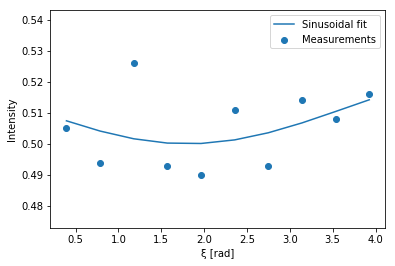

ξ_min :  1.804738922994162 , I_min :  0.5000467244136303


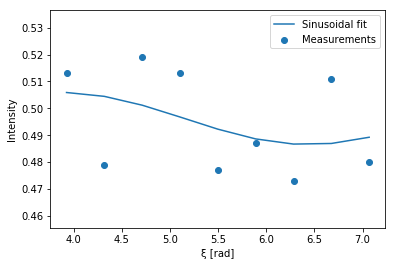

ξ_max :  6.4396139299366695 , I_max :  0.4865175966851253
Point  4 : phi = 0 , theta = 0 , xi = 1.804738922994162
Point  4 : phi = 0 , theta = 0 , xi = 1.804738922994162


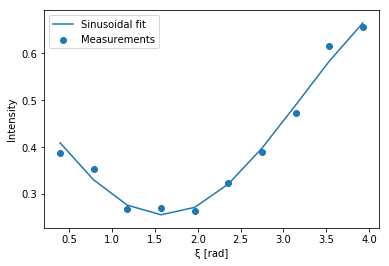

ξ_min :  1.5967136668270703 , I_min :  0.25579287460174327


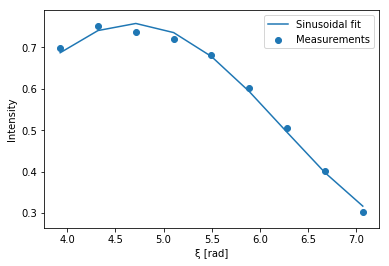

ξ_max :  4.687431447255717 , I_max :  0.758097864544989
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5967136668270703
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5967136668270703


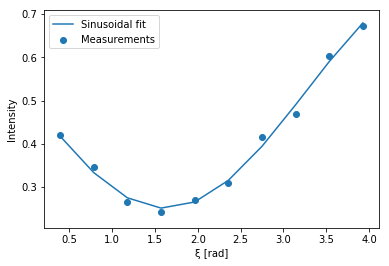

ξ_min :  1.6216953998007335 , I_min :  0.25061040767786247


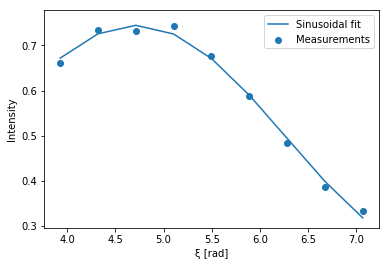

ξ_max :  4.709920022395916 , I_max :  0.7445400010918839
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.6216953998007335
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.6216953998007335


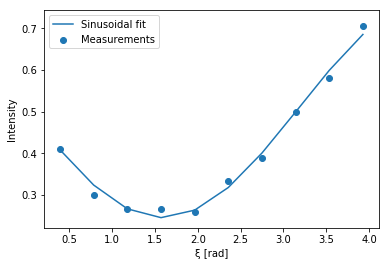

ξ_min :  1.586737649613607 , I_min :  0.24580511142471695


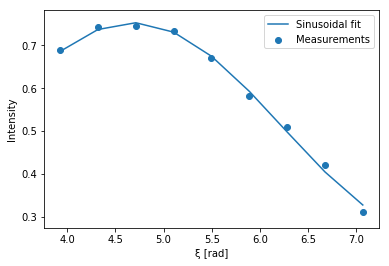

ξ_max :  4.67977950902994 , I_max :  0.7531278464533406
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.586737649613607
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.586737649613607


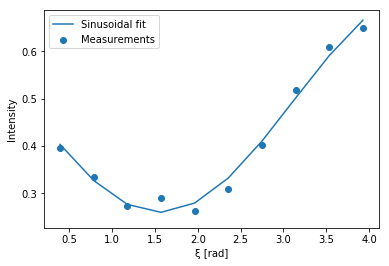

ξ_min :  1.5550184129860136 , I_min :  0.2599710850539978


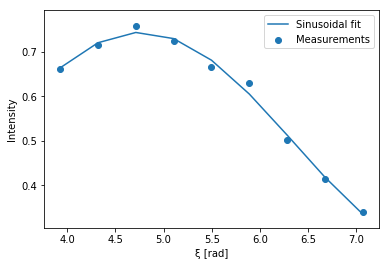

ξ_max :  4.762541059867265 , I_max :  0.7445506681261749
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5550184129860136
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5550184129860136


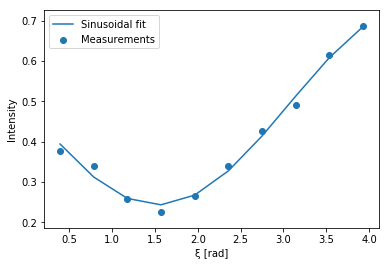

ξ_min :  1.529862589612696 , I_min :  0.24342570596897445


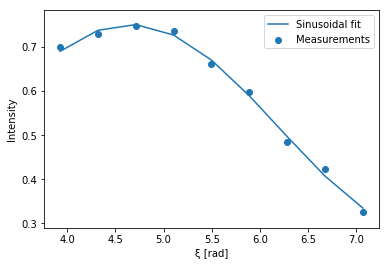

ξ_max :  4.653675479538745 , I_max :  0.7513888021763826
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.529862589612696
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.529862589612696


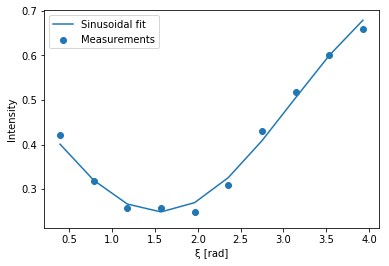

ξ_min :  1.5541186296920904 , I_min :  0.24861843112209994


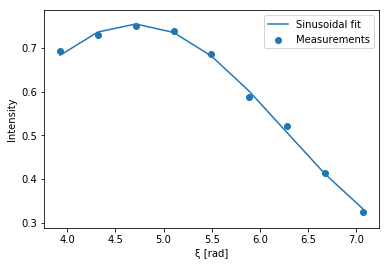

ξ_max :  4.7063706156538965 , I_max :  0.7552112735784101
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5541186296920904
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5541186296920904


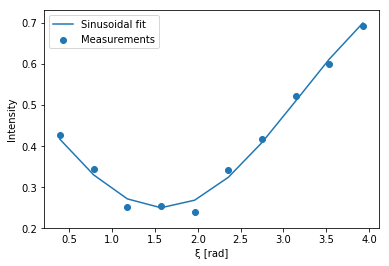

ξ_min :  1.5864717058196434 , I_min :  0.24992093124067133


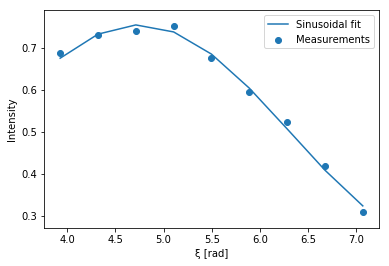

ξ_max :  4.73938980926432 , I_max :  0.7537782691464753
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5864717058196434
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5864717058196434


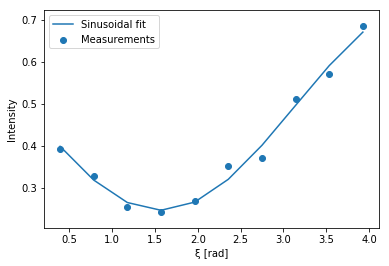

ξ_min :  1.5656589267362053 , I_min :  0.24733090567053612


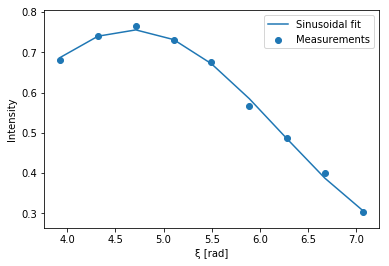

ξ_max :  4.670077356766169 , I_max :  0.7560129974389365
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5656589267362053
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5656589267362053


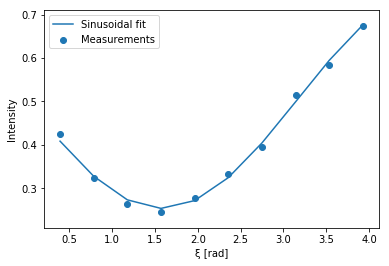

ξ_min :  1.5798867303860262 , I_min :  0.25407466114415844


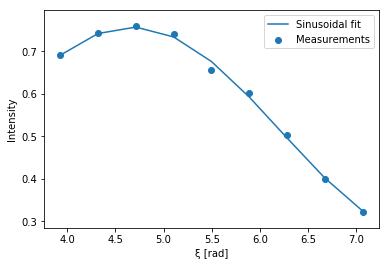

ξ_max :  4.670953196912635 , I_max :  0.756936668554677
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5798867303860262
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5798867303860262


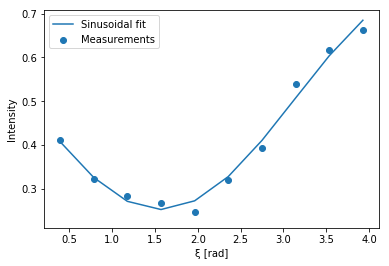

ξ_min :  1.5647929129407443 , I_min :  0.252365386340368


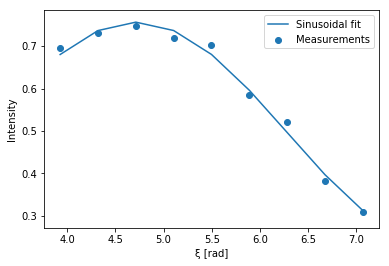

ξ_max :  4.712877066523763 , I_max :  0.7563295895288906
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5647929129407443
Point  3 : phi = 0.261825 , theta = 1.5707963267948966 , xi = 1.5647929129407443


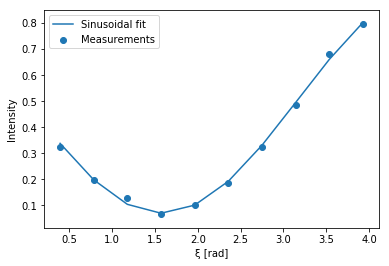

ξ_min :  1.5803268732551536 , I_min :  0.07017381137138251


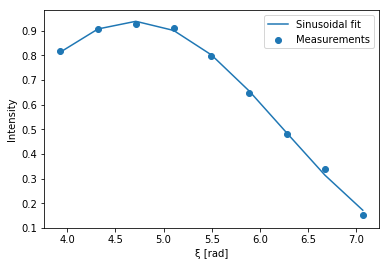

ξ_max :  4.6949159822538755 , I_max :  0.938557983973943
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.5803268732551536
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.5803268732551536


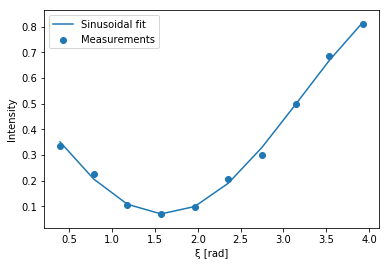

ξ_min :  1.59729028889752 , I_min :  0.06969232905551231


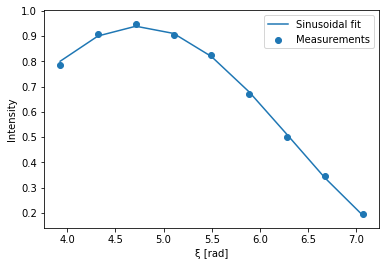

ξ_max :  4.742211499488346 , I_max :  0.9393040441467622
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.59729028889752
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.59729028889752


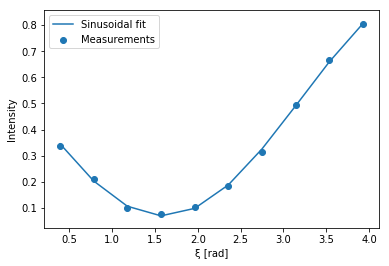

ξ_min :  1.5956114297619308 , I_min :  0.06899633020434259


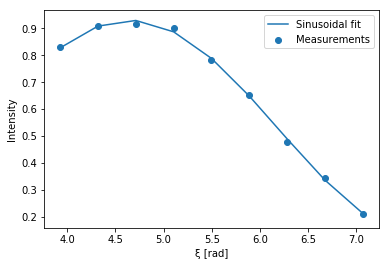

ξ_max :  4.645399669732183 , I_max :  0.9299210084464589
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.5956114297619308
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.5956114297619308


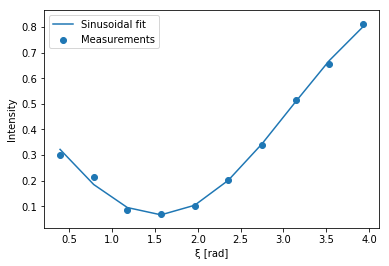

ξ_min :  1.5438103781298542 , I_min :  0.06701556945156589


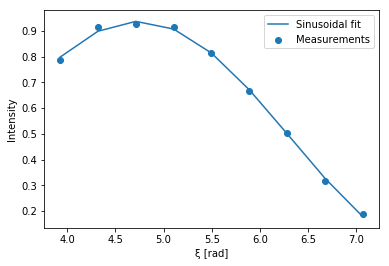

ξ_max :  4.737249424040823 , I_max :  0.9375299725063466
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.5438103781298542
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.5438103781298542


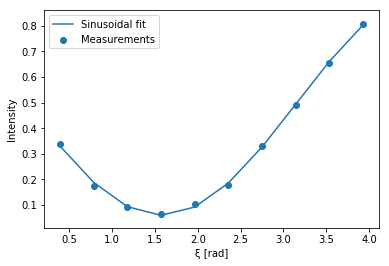

ξ_min :  1.5753869584690388 , I_min :  0.05923803441472386


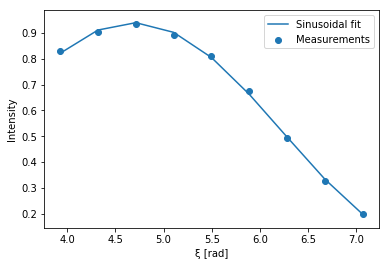

ξ_max :  4.685398270493732 , I_max :  0.9404898465286387
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.5753869584690388
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.5753869584690388


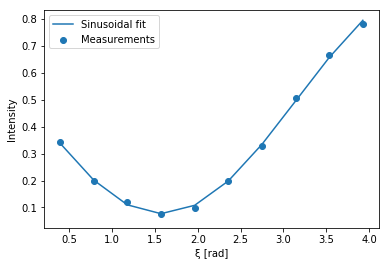

ξ_min :  1.5762255757448278 , I_min :  0.0768731321993672


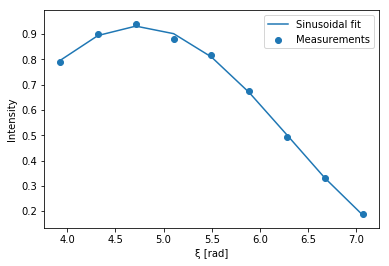

ξ_max :  4.733950984983083 , I_max :  0.9316511456077177
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.5762255757448278
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.5762255757448278


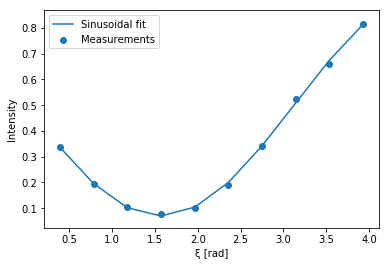

ξ_min :  1.563985545352059 , I_min :  0.06966509243490249


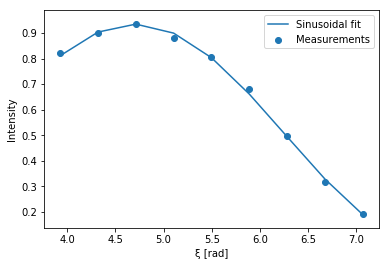

ξ_max :  4.6999582621276454 , I_max :  0.9346792350199207
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.563985545352059
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.563985545352059


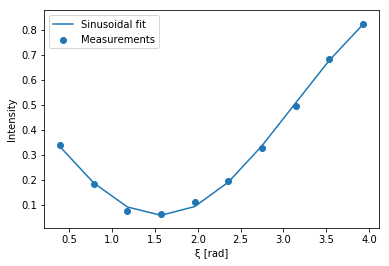

ξ_min :  1.566234933370606 , I_min :  0.05863295290212889


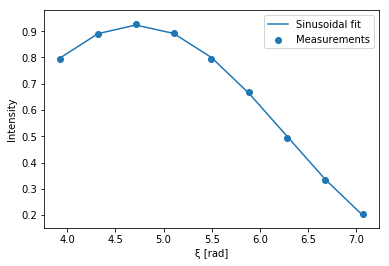

ξ_max :  4.714860176438966 , I_max :  0.9235245124741578
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.566234933370606
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.566234933370606


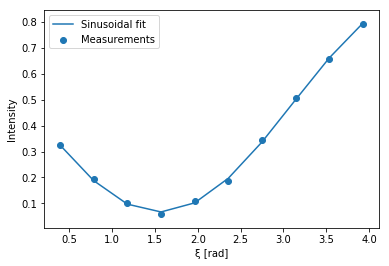

ξ_min :  1.5557328277811977 , I_min :  0.06710355586744932


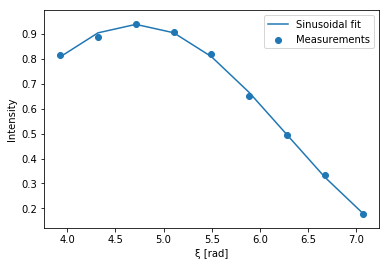

ξ_max :  4.713662366485348 , I_max :  0.9392131544092899
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.5557328277811977
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.5557328277811977


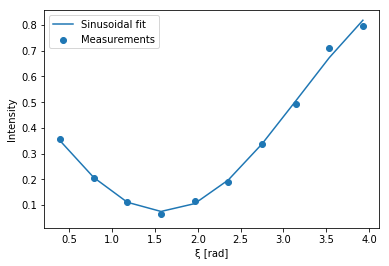

ξ_min :  1.586612357077305 , I_min :  0.07434415125650529


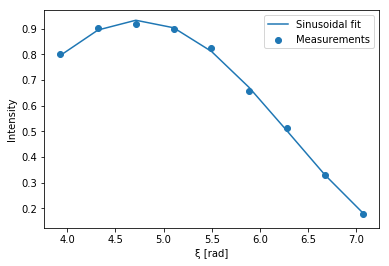

ξ_max :  4.738209596040312 , I_max :  0.9334113540755453
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.586612357077305
Point  2 : phi = 0.523599 , theta = 1.5707963267948966 , xi = 1.586612357077305


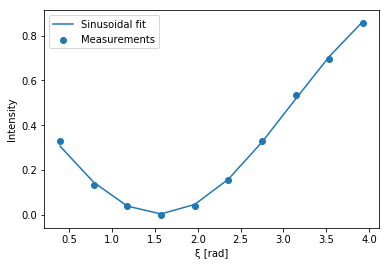

ξ_min :  1.5516584427278202 , I_min :  0.0039047264127267667


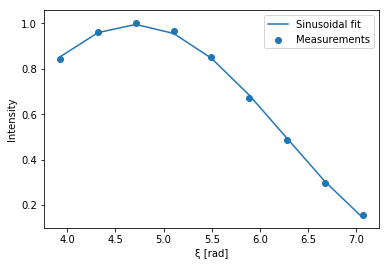

ξ_max :  4.702839975872619 , I_max :  0.9954014278507539
Point  1 : phi = 0.7853981633974483 , theta = 1.5707963267948966 , xi = 1.5516584427278202
Point  1 : phi = 0.7853981633974483 , theta = 1.5707963267948966 , xi = 1.5516584427278202


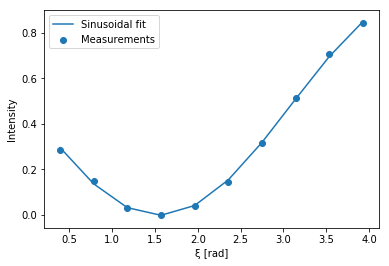

ξ_min :  1.5461474636854344 , I_min :  -0.0023914691905905228


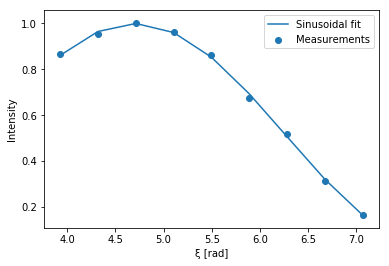

ξ_max :  4.700352199635257 , I_max :  0.9997401043251262
Point  1 : phi = 0.7853981633974483 , theta = 1.5707963267948966 , xi = 1.5461474636854344
Point  1 : phi = 0.7853981633974483 , theta = 1.5707963267948966 , xi = 1.5461474636854344


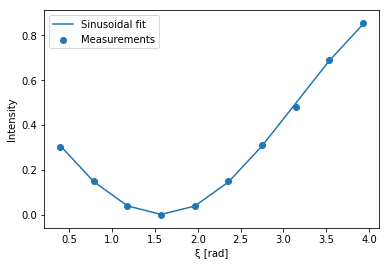

ξ_min :  1.5741001570043747 , I_min :  0.0017152398691697157


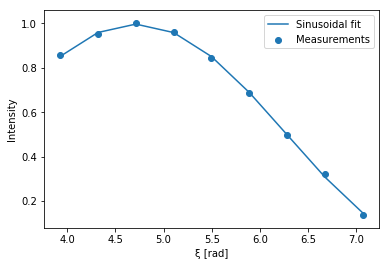

ξ_max :  4.711340068692336 , I_max :  0.9964278283537573
Point  1 : phi = 0.7853981633974483 , theta = 1.5707963267948966 , xi = 1.5741001570043747
Point  1 : phi = 0.7853981633974483 , theta = 1.5707963267948966 , xi = 1.5741001570043747


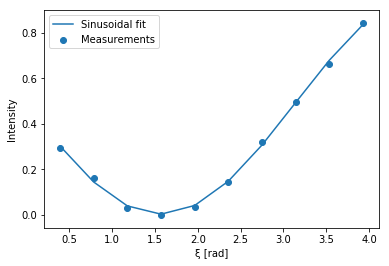

ξ_min :  1.5658496228675363 , I_min :  0.0026788143871114833


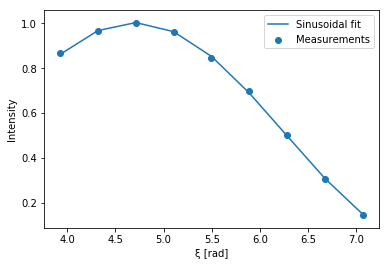

ξ_max :  4.699580134336391 , I_max :  1.003453699351314
Point  1 : phi = 0.7853981633974483 , theta = 1.5707963267948966 , xi = 1.5658496228675363
Point  1 : phi = 0.7853981633974483 , theta = 1.5707963267948966 , xi = 1.5658496228675363


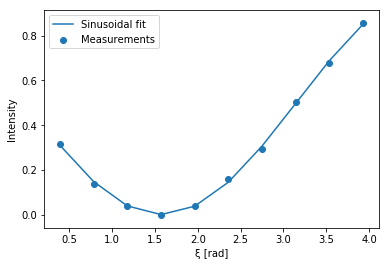

In [ ]:
# Preparing 13 experimental states lying on the V,P,C sphere
for j in range(1,14):
   j=14-j

   # number of measurements to be done for each point = 10, useful to analyse dispersion and errors
   for f in range (1,11):
 
      delta_xi=np.pi/8
   
      xi_inf_1=0.5
      xi_sup_1=4

      xi_inf_1=4
      xi_sup_1=7
  
      # Loop on BS2_bit: first compute the circuit with the beam splitter BS2, then without it (to compute P and C)
      for BS2_bit in range(0,2):

         if BS2_bit==0:
            BS2=1
         if BS2_bit==1:
            BS2=0

         str_BS2='_state'
         if BS2==1:
            str_BS2='_interference_BS2'
         
         # Parameters choosed for the 13 states lying on the sphere
         if j==1:
            phi_D=np.pi/4
            theta_sphere=np.pi/2
         if j==2:
            phi_D=0.523599
            theta_sphere=np.pi/2
         if j==3:
            phi_D=0.261825
            theta_sphere=np.pi/2
         if j==4:
            phi_D=0
            theta_sphere=0
         if j==5:
            phi_D=np.pi/4
            theta_sphere=0.9817
         if j==6:
            phi_D=0.561489
            theta_sphere=0.989
         if j==7:
            phi_D=0.36
            theta_sphere=0.65
         if j==8:
            phi_D=0.261825
            theta_sphere=0
         if j==9:
            phi_D=np.pi/4
            theta_sphere=0.47
         if j==10:
            phi_D=0.659058
            theta_sphere=0.43
         if j==11:
            phi_D=0.561489
            theta_sphere=0.24
         if j==12:
            phi_D=0.523599
            theta_sphere=0
         if j==13:
            phi_D=np.pi/4
            theta_sphere=0
    
         if BS2==1:
            # Compute the experimental values of the phase xi for which we get maximum and minimum intensity due to interference (as those values slightly vary from the analytical ones)
            for extremum in range(1,3):
               # Range of variation of the phase xi
               if extremum==1:
                  xi_inf_1=0.5
                  xi_sup_1=4
               if extremum==2:
                  xi_inf_1=4
                  xi_sup_1=7
 
               qr = QuantumRegister(2)
               cr = ClassicalRegister(2)
               
               # Intensity
               I = []
               # Phase
               Xi=[]
               circuits_xi=[]

               nb_circuits_xi=-1
               # Varies the phase of the beam
               for k in range(round(xi_inf_1/delta_xi),round(xi_sup_1/delta_xi)+1):
                   circuit = QuantumCircuit(qr,cr)                       
                   circuit.u3(phi_D*2,0,0,qr[0])            
                   circuit.cx(qr[0],qr[1]) #---                            
                   circuit.cu3(theta_sphere*2,0,0,qr[0],qr[1])         
                   circuit.x(qr[1])
                   circuit.cu1(k*delta_xi,qr[1],qr[0])      
                   circuit.x(qr[1])

                   # Applying BS2
                   circuit.u3(np.pi/2,np.pi/2,np.pi/2,qr[0])

                   circuit.measure(qr[0], cr[0])
                   circuit.measure(qr[1], cr[1])
                   nb_circuits_xi=nb_circuits_xi+1
                   circuits_xi.append(circuit)
   
               shots=1000
            
               if noise_simulation==1:
                  job = execute(circuits_xi, simulator, noise_model=noise_model,coupling_map=coupling_map,basis_gates=basis_gates)
               elif noise_simulation==0:
                  job = execute(circuits_xi, backend=backend, shots=shots)
            
               result = job.result()
               status = job.status()

               nb_circuits_xi=-1
               for k in range(round(xi_inf_1/delta_xi),round(xi_sup_1/delta_xi)+1):
                   nb_circuits_xi=nb_circuits_xi+1

                   res=result.get_counts(circuits_xi[nb_circuits_xi])
                
                   if correction==1:
                      mitigated_results = meas_filter.apply(res)
                      res=mitigated_results

                   counts=np.array([0,0,0,0])
                   for state, events in res.items():
                      if float(state)==0:
                         counts[0]=float(events)
                      if float(state)==10:
                         counts[1]=float(events)
                      if float(state)==1:
                         counts[2]=float(events)
                      if float(state)==11:
                         counts[3]=float(events)
    
                   # Number of events is converted into probabilities [0,1]
                   counts=counts/shots
                   Zbasis_00=counts[0]
                   Zbasis_01=counts[1]
                   Zbasis_10=counts[2]
                   Zbasis_11=counts[3]

                   # Compute the intensity in one of the output ports of BS2
                   Intensity=Zbasis_00+Zbasis_01

                   I.append(Intensity)
                   Xi.append(k*delta_xi)

               x_data=Xi
               y_data=I
               
               # Recording the extremums of the intensities
               def test_func(x, a, b, c):
                   arg = np.array(x, dtype=float)*b
                   return a * np.sin(arg) + c
          
               params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=None)

               plt.figure(figsize=(6, 4))
               plt.scatter(x_data, y_data, label='Measurements')
               plt.plot(x_data, test_func(x_data, params[0], params[1], params[2]), label='Sinusoidal fit')
               plt.legend(loc='best')
               plt.xlabel('ξ [rad]')
               plt.ylabel('Intensity')
               plt.show()

               def derivative(x):
                   return params[0]*np.cos(params[1]*x)
         
               if np.sign(derivative(xi_inf_1)) == np.sign(derivative(xi_sup_1)):
                  # If no extremum is detected, choose analytical angles
                  if extremum==1:
                     x_min=np.pi/2
                     I_min=test_func(x_min, params[0], params[1], params[2])
                  if extremum==2:
                     x_max=3*np.pi/2
                     I_max=test_func(x_max, params[0], params[1], params[2])

               elif np.sign(derivative(xi_inf_1)) != np.sign(derivative(xi_sup_1)):
                  # If extremums are detected, record associated angles and intensities
                  if extremum==1:
                     x_min=optimize.brentq(derivative, xi_inf_1, xi_sup_1)
                     I_min=test_func(x_min, params[0], params[1], params[2])
                  if extremum==2:
                     x_max=optimize.brentq(derivative, xi_inf_1, xi_sup_1)
                     I_max=test_func(x_max, params[0], params[1], params[2])

               if extremum==1:
                  print('ξ_min : ', x_min, ', I_min : ', I_min)
                  xi_1=x_min
         
               if extremum==2:
                  print('ξ_max : ', x_max, ', I_max : ', I_max)
                  xi_2=x_max

         log=open(path+"/Classical_VDC_point_"+str(j)+str_BS2+"_"+str(f)+".txt","w")

         # Varying φ (HWP2):
         for n in range(1,2):

            for k in range(1,2):
                V_fit=abs(I_max-I_min)
                circuits = []
                if k==1:
                   xi_extrema=xi_1
                if k==2:
                   xi_extrema=xi_2
                
                print('Point ',j,': phi =',phi_D,', theta =',theta_sphere,', xi =',xi_extrema)

                # Density matrix
                rho = np.array([[0+0j, 0+0j, 0+0j, 0+0j], [0+0j, 0+0j, 0+0j, 0+0j], [0+0j, 0+0j, 0+0j, 0+0j], [0+0j, 0+0j, 0+0j, 0+0j]])
                
                # Tomography step
                for i in range(1,2):
                    
                    qr = QuantumRegister(2)
                    if BS2==1:
                       circuit = QuantumCircuit(qr)
                    elif BS2==0:
                       circuit = QuantumCircuit(qr,cr)
                 
                    # Prepare state
                    circuit.u3(phi_D*2,0,0,qr[0]) #------------------------|ψ> = cosφ|00> + sinφ|10>
                    circuit.cx(qr[0],qr[1]) #--------------------------------|ψ> = cosφ|00> + sinφ|11>
                    circuit.cu3(theta_sphere*2,np.pi,np.pi,qr[0],qr[1]) #------|ψ> = cosφ|00> + sinφsinθ|10> + sinφcosθ|11>
                    circuit.x(qr[1])
                    circuit.cu1(xi_extrema,qr[1],qr[0]) #----------------|ψ> = cosφ|00> + e^(ξ)sinφsinθ|10> + sinφcosθ|11>
                    circuit.x(qr[1])
               
                    # Apply BS2
                    if BS2==1:
                       circuit.u3(np.pi/2,np.pi/2,np.pi/2,qr[0])
         
                    # Perform Tomography
                    if BS2==1:
                    
                       qst_VDC = state_tomography_circuits(circuit,[qr[0], qr[1]])
                        
                       if noise_simulation==1:
                          job = execute(qst_VDC, simulator, noise_model=noise_model,coupling_map=coupling_map,basis_gates=basis_gates)
                       elif noise_simulation==0:
                          job = execute(qst_VDC, backend, shots=1000)
                    
                       results=job.result()
                       res=results
                    
                       if correction==1:
                          mitigated_results = meas_filter.apply(results)
                          res=mitigated_results
            
                       tomo_VDC = StateTomographyFitter(res, qst_VDC)

                       rho = tomo_VDC.fit()
                       
                    if BS2==0:
                       circuit.measure(qr[0], cr[0])
                       circuit.measure(qr[1], cr[1])

                       shots=1000
                  
                       if noise_simulation==1:
                          job = execute(circuit, simulator, noise_model=noise_model,coupling_map=coupling_map,basis_gates=basis_gates)
                       elif noise_simulation==0:
                          job = execute(circuit, backend=backend, shots=shots)
                       
                       result = job.result()
                       
                if BS2==0:
                 
                    res=result.get_counts()
                    if correction==1:
                       mitigated_results = meas_filter.apply(result)
                       res=mitigated_results.get_counts()

                    counts=np.array([0,0,0,0])
                    for state, events in res.items():
                        if float(state)==0:
                            counts[0]=float(events)
                        if float(state)==10:
                            counts[1]=float(events)
                        if float(state)==1:
                           counts[2]=float(events)
                        if float(state)==11:
                           counts[3]=float(events)
    
                    counts=counts/shots
                    if i==1:

                        string_Zbasis_counts = str(counts[0]) + ' ' +str(counts[1]) + ' ' +str(counts[2]) + ' ' +str(counts[3]) + '\n'
                        Zbasis_00=counts[0]
                        Zbasis_01=counts[1]
                        Zbasis_10=counts[2]
                        Zbasis_11=counts[3]

                if BS2==1:        
                   # Compute C
                   Sigma = np.array([[0, 0, 0, -1], [0, 0, 1, 0], [0, 1, 0, 0], [-1, 0, 0, 0]])
                   rho_transpose = np.transpose(rho)
                   V_p_rho=np.linalg.eigvals(rho)
                   R = (rho.dot(Sigma)).dot(rho_transpose.dot(Sigma))
                   V_p=np.linalg.eigvals(R)
                   V_p.sort()
                   arg1=0
                   arg2=np.sqrt(float(abs(V_p[3])))-np.sqrt(float(abs(V_p[2])))-np.sqrt(float(abs(V_p[1])))-np.sqrt(float(abs(V_p[0])))
                   C=max(arg1,arg2)

                # Compute D
                if BS2==0:

                   I=Zbasis_10+Zbasis_11
            
                   D=(max(Zbasis_00+Zbasis_01,Zbasis_10+Zbasis_11)-0.5)*2

                # Output string data
                if BS2==1:
                   string_C_V_D_theta_xi = str(0) + ' ' +str(V_fit) + ' ' +str(0) + '\n'
                if BS2==0:
                   string_C_V_D_theta_xi = str(C) + ' ' +str(0) + ' ' +str(D) + ' ' + '\n'
                log.write(string_C_V_D_theta_xi)
              
         log.close()